### **INTRODUCTION**
---
> Identifikasi penginapan (listing) AirBnB untuk kebutuhan liburan Kkeluarga besar, di Kota New York. Penginapan dipilih dengan mempertimbangkan jumlah akomodasi yang ditampung, jumlah kamar tidur, kelengkapan fasilitas, serta tingkat popularitas yang dipresentasikan melalui jumlah ulasan.
---
> Pendekatan analisis dilakukan melalui eksplorasi data (Exploratory Data Analysis/EDA), dengan tahapan utama meliputi penyaringan tipe penginapan berdasarkan kapasitas akomodasi dan jumlah kamar tidur, analisis distribusi harga, identifikasi jenis kamar yang paling sesuai untuk keluarga besar, serta evaluasi kelengkapan fasilitas yang mendukung kenyamanan keluarga.
---
---
(source: https://mavenanalytics.io/data-playground/airbnb-listings-reviews)

### **IMPORT LIBRARY**
---

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.colors as pc
import plotly.express as px
import matplotlib.cm as cm

In [2]:
!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=dcae7339c3b42a9a3be89644c9f58ba3903f176735ff298203c0ef2b0e9b1b62
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


### **IMPORT FILE**

---



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
listing = pd.read_csv('/content/drive/MyDrive/Portfolio Data Analyst/Airbnb/Listings.csv', encoding='latin1', low_memory=False)
review = pd.read_csv('/content/drive/MyDrive/Portfolio Data Analyst/Airbnb/Reviews.csv')

In [5]:
# Ambil data yang ada di kota New York
listing = listing[listing['city'] == 'New York']

In [6]:
# Ambil data dari dataframe review yang sama dengan listing_id df listing
review = review[review['listing_id'].isin(listing['listing_id'])]

### **DATA UNDERSTANDING**
---

In [7]:
# Lihat 5 baris pertama dari dataframe listing dan review
print('DataFrame listing :')
display(listing.head())
print('\n')
print('DataFrame Review :')
display(review.head())

DataFrame listing :


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
9220,3457770,Cute 1 BR in the Lower East Side,9604972,2013-10-23,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,30,1125,80.0,10.0,8.0,8.0,8.0,10.0,10.0,f
9221,4173751,Lovely Apartment in Harlem West,9197440,2013-10-02,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,30,1125,90.0,10.0,9.0,10.0,10.0,9.0,9.0,f
9222,4259427,Appartement en duplex de 3 chambres,21833312,2014-09-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,1125,87.0,9.0,8.0,10.0,10.0,8.0,8.0,f
9223,4370230,NaN,22686810,2014-10-18,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,30,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
9224,5286096,Amazing Studio-EmpireStateBuilding,3866196,2012-10-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,30,1125,93.0,9.0,9.0,9.0,10.0,9.0,9.0,f




DataFrame Review :


,listing_id,review_id,date,reviewer_id
1049370,16821,571714420,2019-12-01,88829744
1049371,29628,571946768,2019-12-01,146149442
1049372,31994,571705182,2019-12-01,302851860
1049373,39704,571829828,2019-12-01,26457005
1049374,43726,571965373,2019-12-01,106741414


In [8]:
# Memahami info dataframe listing
print(listing.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37012 entries, 9220 to 273167
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   37012 non-null  int64  
 1   name                         36999 non-null  object 
 2   host_id                      37012 non-null  int64  
 3   host_since                   36994 non-null  object 
 4   host_location                36896 non-null  object 
 5   host_response_time           18505 non-null  object 
 6   host_response_rate           18505 non-null  float64
 7   host_acceptance_rate         22379 non-null  float64
 8   host_is_superhost            36994 non-null  object 
 9   host_total_listings_count    36994 non-null  float64
 10  host_has_profile_pic         36994 non-null  object 
 11  host_identity_verified       36994 non-null  object 
 12  neighbourhood                37012 non-null  object 
 13  district         

In [9]:
# Memahami info dataframe review
print(review.info())

<class 'pandas.core.frame.DataFrame'>
Index: 847727 entries, 1049370 to 2065525
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   listing_id   847727 non-null  int64 
 1   review_id    847727 non-null  int64 
 2   date         847727 non-null  object
 3   reviewer_id  847727 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.3+ MB
None


In [10]:
# Memgetahui total baris dan total kolom dari dataframe
print(f'Total rows dataframe listing = {(listing.shape[0])}, Total columns dataframe listing = {(listing.shape[1])}')
print(f'Total rows dataframe review = {(review.shape[0])}, Total columns dataframe review = {(review.shape[1])}')

Total rows dataframe listing = 37012, Total columns dataframe listing = 33
Total rows dataframe review = 847727, Total columns dataframe review = 4


In [11]:
# Descriptive statistics melihat kolom dengan nilai 0
print('Descriptive statistics dataframe listing : ')
display(listing.describe().round())
print('\n')
print('Descriptive statistics dataframe review : ')
display(review.describe().round())

Descriptive statistics dataframe listing : 


,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,37012.0,37012.0,18505.0,22379.0,36994.0,37012.0,37012.0,37012.0,33404.0,37012.0,37012.0,3.701200e+04,26777.0,26753.0,26764.0,26741.0,26755.0,26740.0,26740.0
mean,25105891.0,93709486.0,1.0,1.0,24.0,41.0,-74.0,3.0,1.0,143.0,23.0,5.979900e+04,94.0,10.0,9.0,10.0,10.0,10.0,9.0
std,15178805.0,110137427.0,0.0,0.0,158.0,0.0,0.0,2.0,1.0,276.0,26.0,1.116338e+07,10.0,1.0,1.0,1.0,1.0,1.0,1.0
min,2595.0,2438.0,0.0,0.0,0.0,41.0,-74.0,0.0,1.0,0.0,1.0,1.000000e+00,20.0,2.0,2.0,2.0,2.0,2.0,2.0
25%,11033346.0,9643914.0,1.0,1.0,1.0,41.0,-74.0,2.0,1.0,60.0,4.0,9.000000e+01,92.0,9.0,9.0,10.0,10.0,9.0,9.0
50%,24854480.0,40236486.0,1.0,1.0,1.0,41.0,-74.0,2.0,1.0,99.0,30.0,1.125000e+03,97.0,10.0,10.0,10.0,10.0,10.0,10.0
75%,39821927.0,152968334.0,1.0,1.0,2.0,41.0,-74.0,4.0,1.0,151.0,30.0,1.125000e+03,100.0,10.0,10.0,10.0,10.0,10.0,10.0
max,48039776.0,387071756.0,1.0,1.0,2739.0,41.0,-74.0,16.0,21.0,10000.0,1250.0,2.147484e+09,100.0,10.0,10.0,10.0,10.0,10.0,10.0




Descriptive statistics dataframe review : 


,listing_id,review_id,reviewer_id
count,847727.0,847727.0,847727.0
mean,15266656.0,340231451.0,95954374.0
std,12159870.0,209850783.0,93001216.0
min,2595.0,1743.0,1.0
25%,4226098.0,154225560.0,20455564.0
50%,13693976.0,332966572.0,62792126.0
75%,23388053.0,529274584.0,150747374.0
max,47978686.0,729074024.0,387139027.0


In [12]:
# Cek proporsi nilai 0 dari kolom price, accommodates, dan host total listings count
print(f' price 0 = {(listing['price'] == 0).mean().round(6)}')
print(f' accommodates 0 = {(listing['accommodates'] == 0).mean().round(6)}')
print(f' host_total_listing_count 0 = {(listing['host_total_listings_count'] == 0).mean().round(6)}')

 price 0 = 0.000757
 accommodates 0 = 0.000351
 host_total_listing_count 0 = 0.121609


In [13]:
# Nilai 0 pada kolom price dan ganti dengan NaN
listing['price'] = (
    listing['price']
    .astype(float)
    .replace(0, np.nan)
    )

listing['accommodates'] = (
    listing['accommodates']
    .astype(float)
    .replace(0, np.nan)
    )

# Drop rows dengan missing values
listing.dropna(subset=['price', 'accommodates'], inplace=True)

In [14]:
# Mengetahui jumlah unique id dari kolom id pada df listing dan review
print(f'Total unique listing id (dataframe listing) = {listing['listing_id'].nunique()}')
print(f'Total unique host id (dataframe listing) = {listing['host_id'].nunique()}')
print(f'Total unique listing id (dataframe review) = {review['listing_id'].nunique()}')
print(f'Total unique review id (dataframe review) = {review['review_id'].nunique()}')
print(f'Total unique reviewer id (dataframe review) = {review['reviewer_id'].nunique()}')

Total unique listing id (dataframe listing) = 36984
Total unique host id (dataframe listing) = 26742
Total unique listing id (dataframe review) = 27489
Total unique review id (dataframe review) = 847727
Total unique reviewer id (dataframe review) = 747389


In [15]:
# Cek duplikat kolom pada df review
print(f'Total duplicate rows = {review.duplicated().sum()}')
print(f'Total duplicate based listing id = {review['listing_id'].duplicated().sum()}')
print(f'Total duplicate based review id = {review['review_id'].duplicated().sum()}')
print(f'Total duplicate based reviewer id = {review['reviewer_id'].duplicated().sum()}')

Total duplicate rows = 0
Total duplicate based listing id = 820238
Total duplicate based review id = 0
Total duplicate based reviewer id = 100338


In [16]:
# Mengetahui proporsi / persentase dari nilai hilang (missing values)
print(listing.isna().sum() / len(listing) * 100)
print('\n')
print(review.isna().sum() / len(review) * 100)

listing_id                      0.000000
name                            0.035150
host_id                         0.000000
host_since                      0.048670
host_location                   0.313649
host_response_time             50.005408
host_response_rate             50.005408
host_acceptance_rate           39.541423
host_is_superhost               0.048670
host_total_listings_count       0.048670
host_has_profile_pic            0.048670
host_identity_verified          0.048670
neighbourhood                   0.000000
district                        0.000000
city                            0.000000
latitude                        0.000000
longitude                       0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bedrooms                        9.679862
amenities                       0.000000
price                           0.000000
minimum_nights                  0.000000
maximum_nights  

### **DATA CLEANING & HANDLING MISSING VALUES**
---

In [17]:
# Buat salinan dari dataframe untuk dianalisis
listings = listing.copy()
reviews = review.copy()

> **Drop columns**

In [18]:
# Drop baris yang mengandung missing values
cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'host_location', 'name']
listings = listings.dropna(subset=cols)

> **Inconsitency values and change dtypes**

In [19]:
# Mengubah nilai dari kolom
cols = [
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'instant_bookable'
]

# Change t -> 1 and f -> 0
for col in cols:
    listings.loc[:, col] = (
        listings[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({'t':1, 'f':0})
    )

In [20]:
# Mengubah dtypes pada dataframe listing

## dtypes 'object' ke 'datetime'
listings['host_since'] = pd.to_datetime(listings['host_since'])

## dtypes 'object' ke 'int'
cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
listings[cols] = listings[cols].astype(int)

## dtypes 'object' ke 'category'
cols = listings.select_dtypes(include='object').columns
exclude = ['amenities']
for col in cols:
  if col not in exclude:
    listings[col] = listings[col].astype('category')

## dtypes 'float' ke 'int'
listings['latitude'] = listings['latitude'].astype(int)
listings['longitude'] = listings['longitude'].astype(int)

## dtypes 'int' ke 'object'
cols = ['listing_id', 'host_id']
for col in cols:
  listings[col] = listings[col].astype('object')

In [21]:
# Mengubah dtypes pada dataframe review
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['listing_id'] = reviews['listing_id'].astype('object')
reviews['review_id'] = reviews['review_id'].astype('object')
reviews['reviewer_id'] = reviews['reviewer_id'].astype('object')

> **Handling missing values**

In [22]:
# Mengisi missing values dengan median
cols = [
    'host_response_rate',
    'host_acceptance_rate',
    'bedrooms',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
  ]
for col in cols:
  listings[cols] = listings[cols].fillna(listings[cols].median())

In [23]:
# Mengisi missing values dengan modus
listings['host_response_time'] = listings['host_response_time'].fillna(listings['host_response_time'].mode()[0])

> **Emoji issue**

In [24]:
# Permasalahan emoji
listings['name'] = listings['name'].str.replace(
    r'[^\x00-\x7F]+', '', regex=True
)

### **FEATURE ENGINEERING**
---

### **Family suitability score**


In [25]:
# Clip accomodates hingga 10, sesuai untuk ukuran large family

listings['accommodates_norm'] = (
    listings['accommodates'].clip(upper=10) - 1
) / (10 - 1)

In [26]:
# Clip bedrooms hingga 5
# Sesuai untuk ukuran large family, dengan asumsi 2 orang/kamar

listings['bedrooms_norm'] = (
    listings['bedrooms'].clip(upper=5)
) / 5

In [27]:
# Skoring room type

def room_score(rs):
  if 'Entire' in rs:
    return 1
  elif 'Private' in rs:
    return 0.5
  else:
    return 0.2

listings['room_score'] = listings['room_type'].apply(room_score)

In [28]:
# Parse string jadi list
import ast

def parse_amenities(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []
    return []

listings['amenities_list'] = listings['amenities'].apply(parse_amenities)

In [29]:
# Mapping amenities yang diperlukan untuk family vacation
essential_need = [
    'Kitchen', 'Wifi', 'Heating', 'Air conditioning', 'Hot water',
    'Washer', 'Dryer', 'Essentials', 'Smoke alarm', 'Carbon monoxide alarm',
    'Fire extinguisher', 'First aid kit'
]

fam_comfort = [
    'Refrigerator', 'Microwave', 'Oven', 'Stove', 'Dishwasher',
    'Dishes and silverware', 'Cooking basics', 'Extra pillows and blankets',
    'Bed linens', 'Dedicated workspace', 'Free parking on premises',
    'Free street parking', 'Coffee maker', 'Room-darkening shades'
]

child_friendly = [
    'Crib', 'Pack ’n Play/travel crib', 'Baby bath', 'Changing table',
    'Children’s books and toys', 'Outlet covers', 'Window guards'
]

holiday_exp = [
    'Garden or backyard', 'Patio or balcony', 'Indoor fireplace', 'BBQ grill',
    'Outdoor dining area', 'Outdoor furniture', 'Game console', 'Sound system', 'Gym', 'Ethernet connection'
]

# Buat kolom baru untuk sortir listing yang memenuhi essential need
listings['essential_ok'] = listings['amenities_list'].apply(
    lambda x: all(amenity in x for amenity in essential_need)
)

# Ambil listing yang memenuhi essential needs
listings = listings[listings['essential_ok']]

In [30]:
# Hitung skor amenities
listings['fam_comfort_score'] = listings['amenities_list'].apply(
    lambda x: sum(a in x for a in fam_comfort)
)

listings['child_friendly_score'] = listings['amenities_list'].apply(
    lambda x: sum(a in x for a in child_friendly)
)

listings['holiday_exp_score'] = listings['amenities_list'].apply(
    lambda x: sum(a in x for a in holiday_exp)
)

In [31]:
# Normalisasi skala 0 - 1
listings['fam_comfort_norm'] = round(listings['fam_comfort_score'] / len(fam_comfort), 2)
listings['child_friendly_norm'] = round(listings['child_friendly_score'] / len(child_friendly), 2)
listings['holiday_exp_norm'] = round(listings['holiday_exp_score'] / len(holiday_exp), 2)

In [32]:
# Hitung bobot dari masing-masing normalisasi amenities
listings['amenity_score'] = (
    0.5 * listings['fam_comfort_norm'] +
    0.3 * listings['child_friendly_norm'] +
    0.2 * listings['holiday_exp_norm']
)

In [33]:
# Skoring untuk family suitability

listings['family_suitability_score'] = (
    0.40 * listings['accommodates_norm'] +
    0.25 * listings['bedrooms_norm'] +
    0.15 * listings['room_score'] +
    0.20 * listings['amenity_score']
)

In [34]:
# Interpretasi hasil skoring

def family_label(score):
    if score >= 0.8:
        return 'Excellent for Large Families'
    elif score >= 0.6:
        return 'Good for Families'
    elif score >= 0.4:
        return 'Moderate'
    else:
        return 'Not Family-Friendly'

listings['family_suitability'] = listings['family_suitability_score'].apply(family_label)

In [35]:
# Buat normalitas untuk family suitability

listings['family_suitability_norm'] = (
    listings['family_suitability_score'] - listings['family_suitability_score'].min()
) / (
    listings['family_suitability_score'].max() - listings['family_suitability_score'].min()
)

### **Value for Money score**

In [36]:
# Buat kolom harga tiap kepala/orang
listings['price_per_person'] = (
    listings['price'] / listings['accommodates']
).round(2)

In [37]:
# Cari tahu harga standar per orang di tiap district
median_price_pp = (
    listings.groupby('district', observed=True)['price_per_person']
      .median()
      .reset_index()
      .rename(columns={'price_per_person': 'price_per_person_district'})
      .round(2)
)

In [38]:
# Join dataframe median_price_pp dan listings
listings = listings.merge(
    median_price_pp,
    on='district',
    how='left'
)

In [39]:
# Buat perbandingan dan skoring value for money
listings['value_money_score'] = (
    listings['price_per_person_district'] / listings['price_per_person']
)

In [40]:
# Buat normalitas untuk value money score

listings['value_money_norm'] = (
    listings['value_money_score'] - listings['value_money_score'].min()
) / (
    listings['value_money_score'].max() - listings['value_money_score'].min()
)

In [41]:
# Total listings dengan harga minimum, optimum, dan maksimum
q1 = listings['price'].quantile(0.25)
q2 = listings['price'].quantile(0.5)
q3 = listings['price'].quantile(0.75)

listings['price_group'] = np.select(
    [
        listings['price'] < q1,
        (listings['price'] >= q1) & (listings['price'] < q2),
        (listings['price'] >= q2) & (listings['price'] <= q3),
        listings['price'] > q3
    ],
    [
        'Lower-priced (< Q1)',
        'Mid-range (Q1–Median)',
        'Optimum (Median–Q3)',
        'Expensive (> Q3)'
    ],
    default='Unknown'
)

### **Popularity score**

In [42]:
# Set tanggal analisis
analysis_date = pd.Timestamp('2021-03-01')

# Aggregasi ulasan (reviews) -> 1 listings, total ulasan (reviews) dan tgl terakhir ulasan (reviews)
reviews_agg = (
    reviews
    .loc[reviews['date'] <= analysis_date]
    .groupby('listing_id')
    .agg(
        total_reviewers = ('reviewer_id', 'nunique'),
        total_reviews = ('date', 'count'),
        first_review = ('date', 'min'),
        last_review = ('date', 'max')
    )
    .reset_index()
)

In [43]:
# Buat kolom untuk mengetahui AirBnB telah aktif berapa bulan
reviews_agg['months_active'] = (
    (analysis_date - reviews_agg['first_review']).dt.days / 30
).clip(lower=1).round(0)

In [44]:
# Mengetahui total reviews per bulan
reviews_agg['reviews_per_month'] = (reviews_agg['total_reviews'] / reviews_agg['months_active']).round(0)

### **Final dataframe**

In [45]:
# Join dataframe listings dan reviews
df = (
    listings
    .merge(reviews_agg, on='listing_id', how='left')
)

In [46]:
# Isi dengan 0
df[['total_reviews', 'reviews_per_month']] = (df[['total_reviews', 'reviews_per_month']].fillna(0))

In [47]:
# Log transformasi
df['log_reviews'] = np.log1p(df['total_reviews'])

# Ulasan terbaru
df['days_since_last_review'] = (
    analysis_date - df['last_review']
).dt.days

df['days_since_last_review'] = (
    df['days_since_last_review']
    .fillna(df['days_since_last_review'].max())
    .clip(lower=0)
)

df['recency_score'] = np.exp(-df['days_since_last_review'] / 180)

# Skala
for col in ['log_reviews', 'reviews_per_month', 'recency_score']:
    df[col + '_scaled'] = (
        (df[col] - df[col].min()) /
        (df[col].max() - df[col].min())
    )

# Skoring popularity
df['popularity_score'] = (
    0.4 * df['log_reviews_scaled'] +
    0.3 * df['reviews_per_month_scaled'] +
    0.3 * df['recency_score_scaled']
)

In [48]:
# Buat normalitas untuk popularity score

df['popularity_norm'] = (
    df['popularity_score'] - df['popularity_score'].min()
) / (
    df['popularity_score'].max() - df['popularity_score'].min()
)

In [49]:
# Score final
df['final_score'] = (
    0.40 * df['family_suitability_norm'] +
    0.35 * df['popularity_norm'] +
    0.25 * df['value_money_norm']
)

In [50]:
# Membatasi nilai pada maximum night untuk menghindari outliers
# Jika lebih dari 365 hari, maka ditulis 365
# Penginapan dengan 365 hari, dimaksudkan untuk 'tidak ada batas waktu'

# Simpan dalam kolom baru
df['max_nights'] = df['maximum_nights'].clip(upper=400)

# Drop kolom asli maximum nights
df.drop(columns='maximum_nights', axis=1, inplace=True)

# Ubah nama kolom minimum_nights
df.rename(columns={'minimum_nights':'min_nights'}, inplace=True)

### **Filter Large family (> 5) dan Bedrooms >= 3**

In [51]:
# Buat kategori family size
# Family size berdasarkan akomodasi yang bisa ditampung oleh listings

df['family_size'] = pd.cut(
    df['accommodates'],
    bins=[1, 3, 4, np.inf],
    labels=['Private', 'Small family (3-4)', 'Large family (> 5)']
)

In [52]:
# Filter dataframe dengan Large family (>5) dan drop listing yang Not Family-Friendly
large_fam = df[
    (df['family_size'] == 'Large family (> 5)') &
    (df['bedrooms'] >= 3)
    ].copy()

# Drop listings yang tidak ramah untuk keluarga
large_fam.drop(large_fam[large_fam['family_suitability_score'] < 0.4].index, inplace=True)

### **Correlation Heatmap**

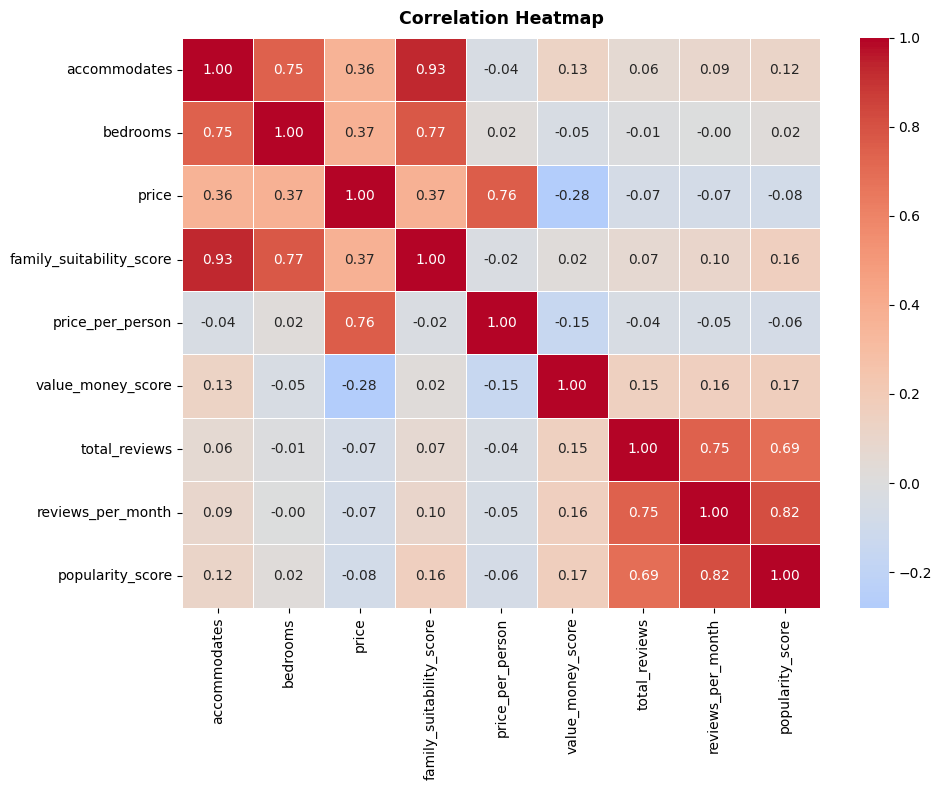

In [53]:
# Korelasi price dengan kolom numerik lainnya
cols = ['accommodates', 'bedrooms', 'price', 'family_suitability_score',
        'price_per_person', 'value_money_score', 'total_reviews',
        'reviews_per_month', 'popularity_score']

# Pastikan hanya numerik
corr = (
    df[cols]
    .select_dtypes(include=np.number)
    .corr(method='pearson')
)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Correlation Heatmap', fontweight='bold', pad=10, fontsize=12.5)
plt.tight_layout()
plt.show()

### **EXPLORATORY DATA ANALYSIS**
---

### **Descriptive statistics**

In [54]:
# Descriptive statistik pada kolom dengan dtypes 'int'
cols = (
    df
    .select_dtypes(include='int64')
    .columns
    .difference(['latitude', 'longitude'])
)
df[cols].describe().round(2)

,child_friendly_score,fam_comfort_score,holiday_exp_score,host_has_profile_pic,host_identity_verified,host_is_superhost,instant_bookable,max_nights,min_nights
count,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00
mean,0.51,8.84,1.21,1.00,0.84,0.41,0.31,272.88,19.75
std,1.05,3.80,1.33,0.06,0.37,0.49,0.46,161.82,23.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00
25%,0.00,7.00,0.00,1.00,1.00,0.00,0.00,90.00,3.00
50%,0.00,10.00,1.00,1.00,1.00,0.00,0.00,400.00,30.00
75%,1.00,12.00,2.00,1.00,1.00,1.00,1.00,400.00,30.00
max,7.00,14.00,7.00,1.00,1.00,1.00,1.00,400.00,365.00


In [55]:
# Descriptive statistic pada kolom dengan dtypes 'float64'
df.describe(include='float64').round(2)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,reviews_per_month,log_reviews,days_since_last_review,recency_score,log_reviews_scaled,reviews_per_month_scaled,recency_score_scaled,popularity_score,popularity_norm,final_score
count,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,...,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00,2140.00
mean,0.94,0.83,9.51,3.64,1.60,200.33,95.80,9.75,9.60,9.83,...,0.87,2.49,650.73,0.30,0.40,0.10,0.35,0.29,0.31,0.28
std,0.19,0.26,62.72,2.53,1.13,335.08,7.14,0.74,0.83,0.66,...,1.21,1.69,814.91,0.31,0.27,0.13,0.35,0.21,0.23,0.12
min,0.00,0.00,0.00,1.00,1.00,14.00,20.00,2.00,2.00,2.00,...,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
25%,1.00,0.79,1.00,2.00,1.00,70.00,95.00,10.00,9.00,10.00,...,0.00,1.10,92.00,0.02,0.18,0.00,0.03,0.12,0.13,0.18
50%,1.00,0.94,1.00,3.00,1.00,125.00,97.00,10.00,10.00,10.00,...,0.00,2.56,352.50,0.14,0.41,0.00,0.16,0.29,0.31,0.26
75%,1.00,1.00,3.00,5.00,2.00,220.00,99.00,10.00,10.00,10.00,...,1.00,3.91,670.00,0.60,0.62,0.11,0.69,0.45,0.49,0.36
max,1.00,1.00,1827.00,16.00,21.00,10000.00,100.00,10.00,10.00,10.00,...,9.00,6.28,2382.00,0.88,1.00,1.00,1.00,0.93,1.00,0.76


In [56]:
# Descriptive statistic pada kolom dengan dtypes 'float64'
reviews_agg.describe(include='all').round(2)

,listing_id,total_reviewers,total_reviews,first_review,last_review,months_active,reviews_per_month
count,27489.00,27489.00,27489.00,27489,27489,27489.00,27489.00
mean,22451258.30,30.21,30.84,2017-11-02 17:04:41.698133760,2019-08-06 00:37:08.440467200,40.47,0.74
min,2595.00,1.00,1.00,2009-04-23 00:00:00,2010-12-21 00:00:00,1.00,0.00
25%,9709428.00,3.00,3.00,2016-05-08 00:00:00,2018-12-28 00:00:00,19.00,0.00
50%,21677581.00,9.00,9.00,2018-03-03 00:00:00,2020-01-13 00:00:00,36.00,0.00
75%,35124311.00,33.00,33.00,2019-08-14 00:00:00,2020-11-06 00:00:00,59.00,1.00
max,47978686.00,747.00,753.00,2021-02-05 00:00:00,2021-02-05 00:00:00,144.00,36.00
std,14191554.93,52.11,53.29,NaN,NaN,26.41,1.29


### **Histogram**

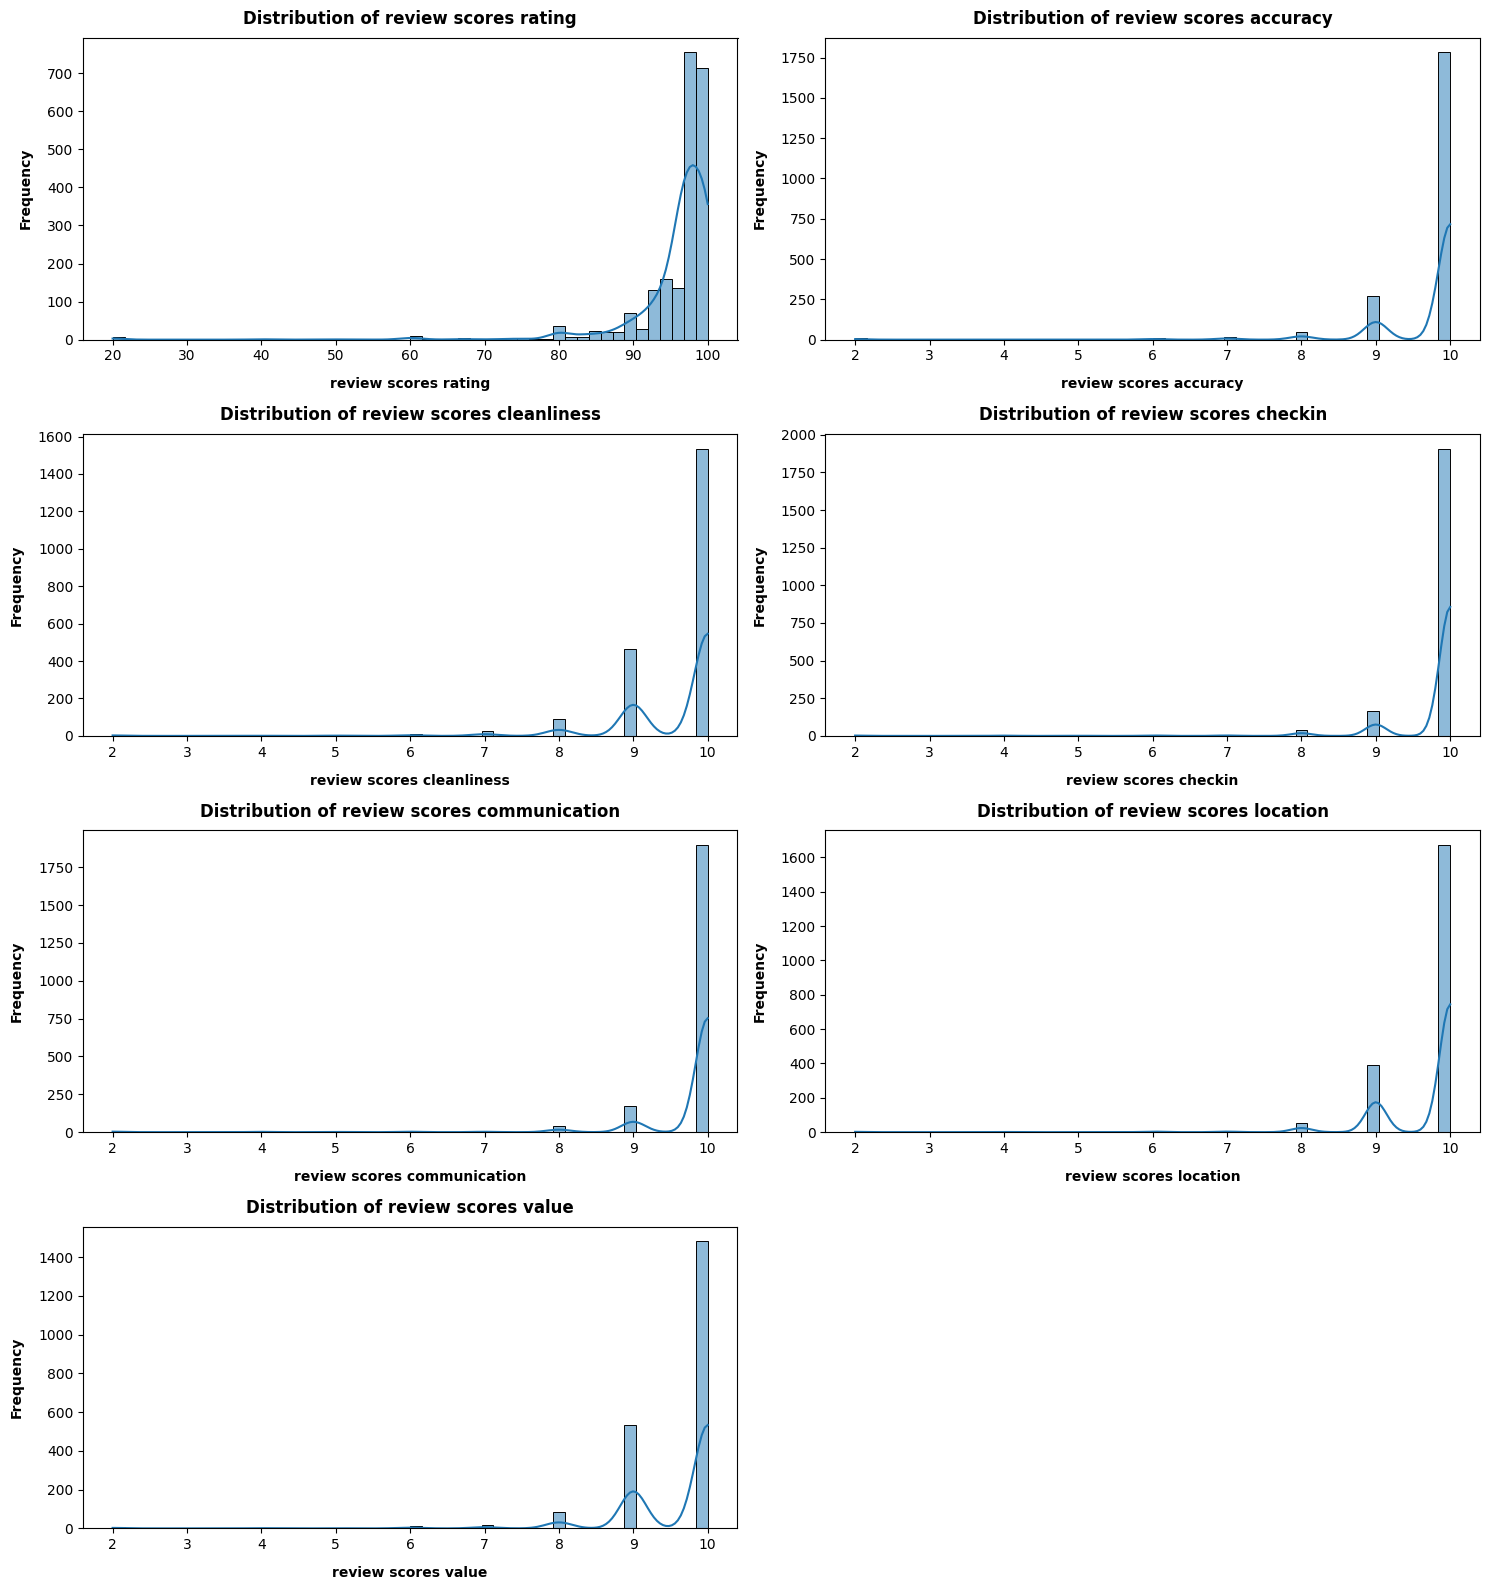

In [58]:
# Menampilkan histogram

# Definisikan kolom
cols = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

# Tentukan jumlah kolom dan baris untuk layout subplot
n_cols = 2 # Jumlah kolom dalam grid
n_rows = (len(cols) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan (pembulatan ke atas)

# Buat figure dengan ukuran yang disesuaikan
plt.figure(figsize=(15, 4 * n_rows))

# Loop untuk membuat histogram setiap kolom
for i, col in enumerate(cols):
  plt.subplot(n_rows, n_cols, i + 1) # Buat subplot pada posisi ke-(i+1)
  sns.histplot(df[col], bins=50, kde=True)
  plt.title(f'Distribution of {col.replace('_', ' ')}', pad=10, fontweight='bold')
  plt.xlabel(f'{col.replace('_', ' ')}', labelpad=10, fontweight='bold')
  plt.ylabel('Frequency', labelpad=10, fontweight='bold')

# Tampilkan semua plot
plt.tight_layout() # Sesuaikan jarak antar subplot agar tidak tumpang tindih
plt.show()

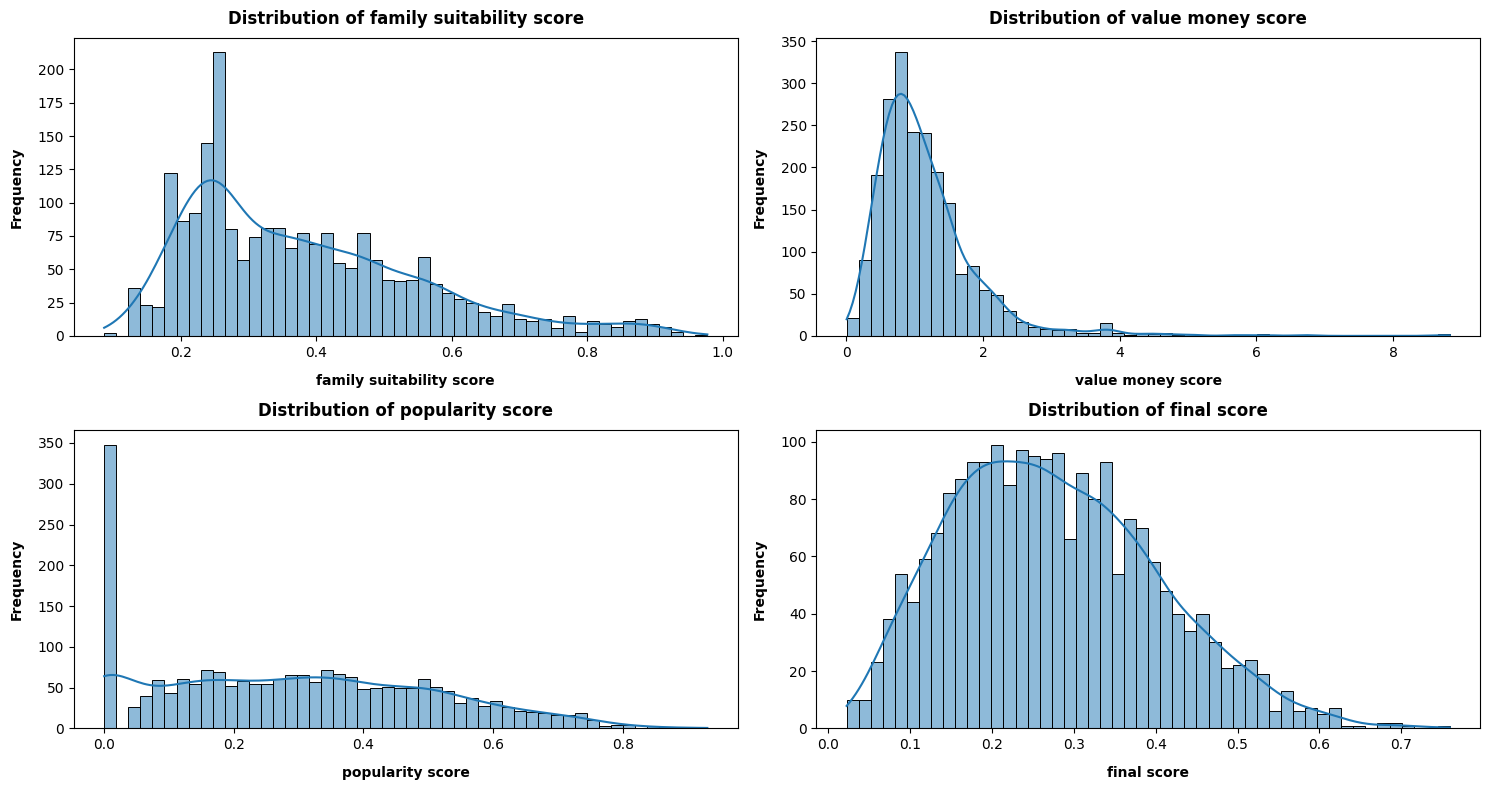

In [59]:
# Menampilkan histogram

# Definisikan kolom numerik
cols = ['family_suitability_score', 'value_money_score', 'popularity_score', 'final_score']

# Tentukan jumlah kolom dan baris untuk layout subplot
n_cols = 2 # Jumlah kolom dalam grid
n_rows = (len(cols) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan (pembulatan ke atas)

# Buat figure dengan ukuran yang disesuaikan
plt.figure(figsize=(15, 4 * n_rows))

# Loop untuk membuat histogram setiap kolom
for i, col in enumerate(cols):
  plt.subplot(n_rows, n_cols, i + 1) # Buat subplot pada posisi ke-(i+1)
  sns.histplot(df[col], bins=50, kde=True)
  plt.title(f'Distribution of {col.replace('_', ' ')}', pad=10, fontweight='bold')
  plt.xlabel(f'{col.replace('_', ' ')}', labelpad=10, fontweight='bold')
  plt.ylabel('Frequency', labelpad=10, fontweight='bold')

# Tampilkan semua plot
plt.tight_layout() # Sesuaikan jarak antar subplot agar tidak tumpang tindih
plt.show()

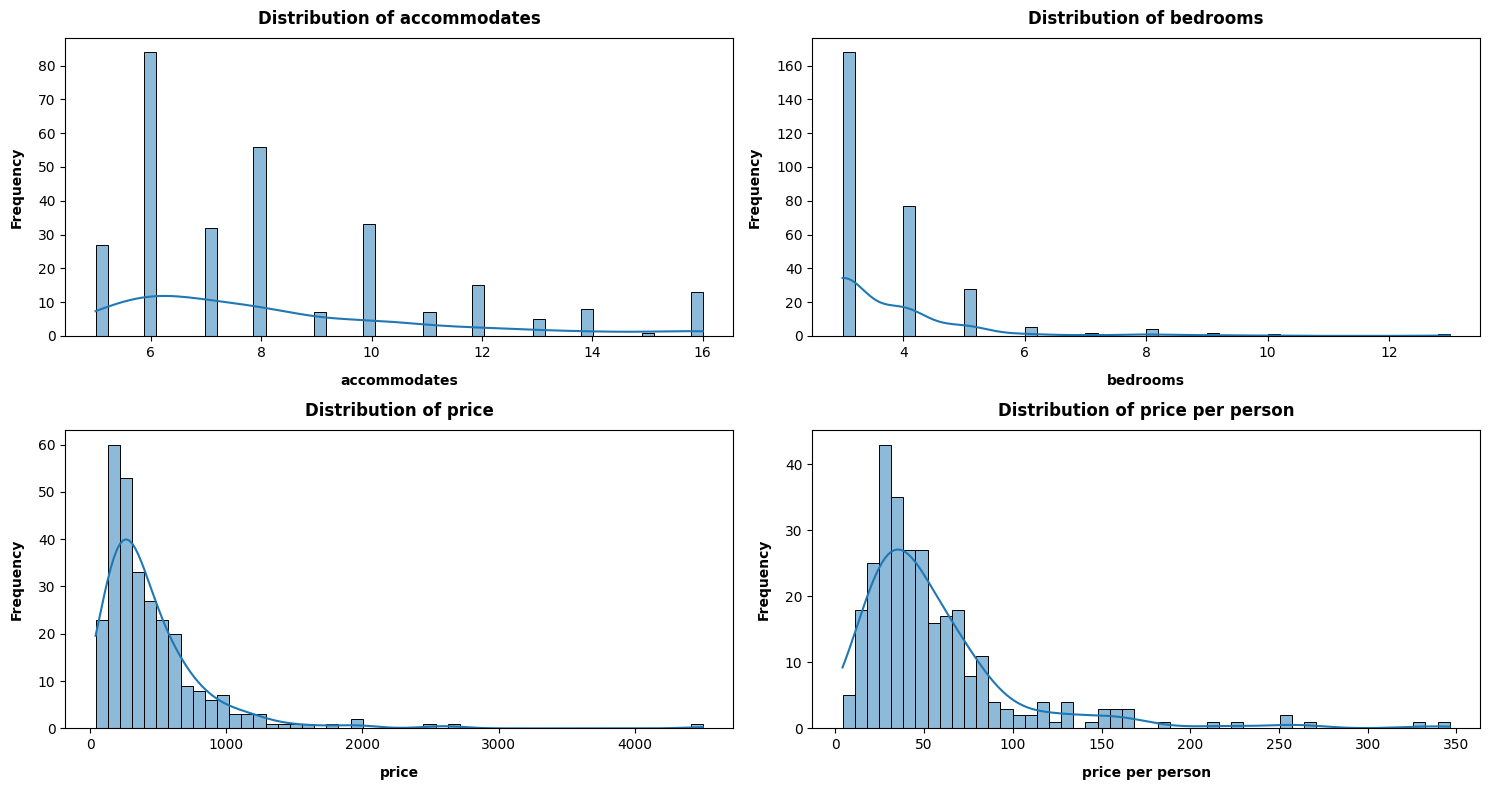

In [60]:
# Menampilkan histogram

# Definisikan kolom numerik
cols = ['accommodates', 'bedrooms', 'price', 'price_per_person']

# Tentukan jumlah kolom dan baris untuk layout subplot
n_cols = 2 # Jumlah kolom dalam grid
n_rows = (len(cols) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan (pembulatan ke atas)

# Buat figure dengan ukuran yang disesuaikan
plt.figure(figsize=(15, 4 * n_rows))

# Loop untuk membuat histogram setiap kolom
for i, col in enumerate(cols):
  plt.subplot(n_rows, n_cols, i + 1) # Buat subplot pada posisi ke-(i+1)
  sns.histplot(large_fam[col], bins=50, kde=True)
  plt.title(f'Distribution of {col.replace('_', ' ')}', pad=10, fontweight='bold')
  plt.xlabel(f'{col.replace('_', ' ')}', labelpad=10, fontweight='bold')
  plt.ylabel('Frequency', labelpad=10, fontweight='bold')

# Tampilkan semua plot
plt.tight_layout() # Sesuaikan jarak antar subplot agar tidak tumpang tindih
plt.show()

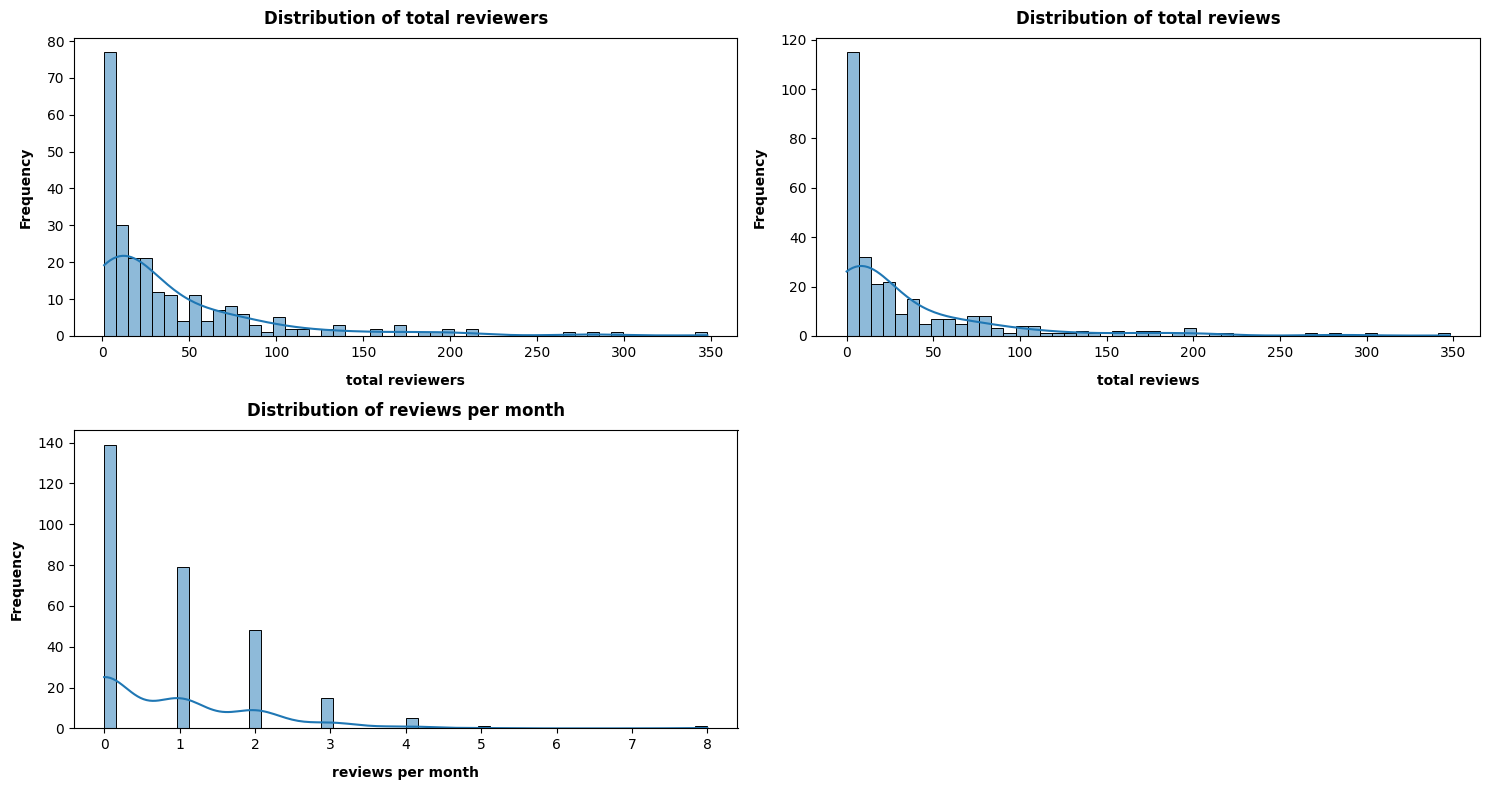

Median total reviewers = 20.0
Median total reviews = 13.0


In [61]:
# Menampilkan histogram

# Definisikan kolom numerik
cols = ['total_reviewers', 'total_reviews', 'reviews_per_month']

# Tentukan jumlah kolom dan baris untuk layout subplot
n_cols = 2 # Jumlah kolom dalam grid
n_rows = (len(cols) + n_cols - 1) // n_cols # Hitung jumlah baris yang dibutuhkan (pembulatan ke atas)

# Buat figure dengan ukuran yang disesuaikan
plt.figure(figsize=(15, 4 * n_rows))

# Loop untuk membuat histogram setiap kolom
for i, col in enumerate(cols):
  plt.subplot(n_rows, n_cols, i + 1) # Buat subplot pada posisi ke-(i+1)
  sns.histplot(large_fam[col], bins=50, kde=True)
  plt.title(f'Distribution of {col.replace('_', ' ')}', pad=10, fontweight='bold')
  plt.xlabel(f'{col.replace('_', ' ')}', labelpad=10, fontweight='bold')
  plt.ylabel('Frequency', labelpad=10, fontweight='bold')

# Tampilkan semua plot
plt.tight_layout() # Sesuaikan jarak antar subplot agar tidak tumpang tindih
plt.show()

# Median total reviewers dan reviews
print(f'Median total reviewers = {large_fam["total_reviewers"].median()}')
print(f'Median total reviews = {large_fam["total_reviews"].median()}')

### **LISTINGS**
---

### **Distribution family suitability score**

Text(0, 0.5, 'Frequency')

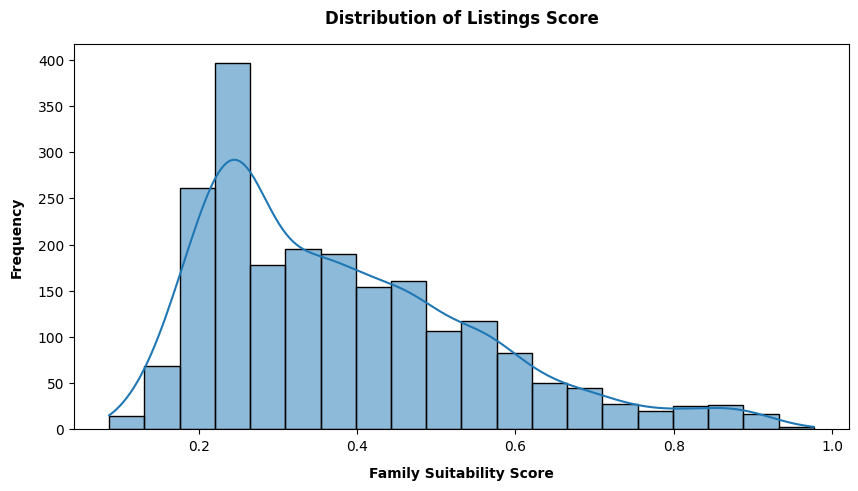

In [62]:
# Distribusi skoring family suitability
plt.figure(figsize=(10, 5))
sns.histplot(df['family_suitability_score'], bins=20, kde=True)
plt.title('Distribution of Listings Score', pad=15, fontweight='bold')
plt.xlabel('Family Suitability Score', labelpad=10, fontweight='bold')
plt.ylabel('Frequency', labelpad=10, fontweight='bold')

> **Insight :**
1. Berdasarkan skor kesesuaian untuk keluarga, penginapan yang tercatat di AirBnB dominan memiliki skor < 0.4 (Not Family-Friendly / tidak untuk keluarga)
2. Jumlah penginapan untuk keluarga lebih sedikit, sehingga pilihan lebih terbatas. Kondisi ini berpotensi meningkatkan kompetisi dan harga pada segmen penginapan keluarga, terutama pada periode permintaan tinggi seperti liburan.

### **Total listings by family size**

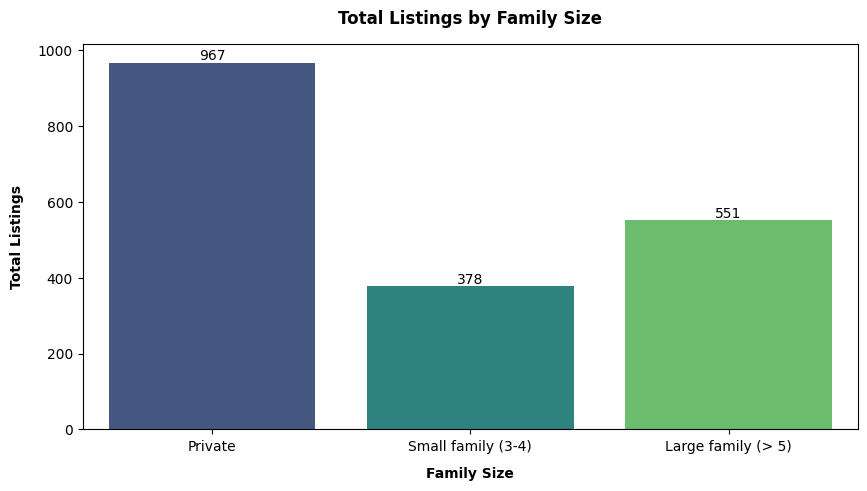

In [63]:
# Bar chart untuk kategori family size
family_size = df['family_size'].value_counts().reset_index()
family_size.columns = ['family_size', 'total_listings']

# Bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=family_size,
    x='family_size',
    y='total_listings',
    hue='family_size',
    palette='viridis'
)

# Label
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )

plt.title('Total Listings by Family Size', pad=15, fontweight='bold')
plt.xlabel('Family Size', labelpad=10, fontweight='bold')
plt.ylabel('Total Listings', labelpad=10, fontweight='bold')
plt.show()

> **Insight :**
1. Berdasarkan jumlah akomodasi yang bisa ditampung, AirBnB lebih banyak mencatat penginapan untuk kategori private (1-2 org), kemudian diikuti kategori keluarga besar (> 5 org) dan paling sedikit untuk kategori keluarga kecil (3-4 org)
2. Penginapan yang sesuai untuk keluarga besar merupakan segmen menengah, sehingga pilihan terbatas, khususnya pada periode permintaan tinggi seperti saat liburan

### **Total listings by district : for large family**

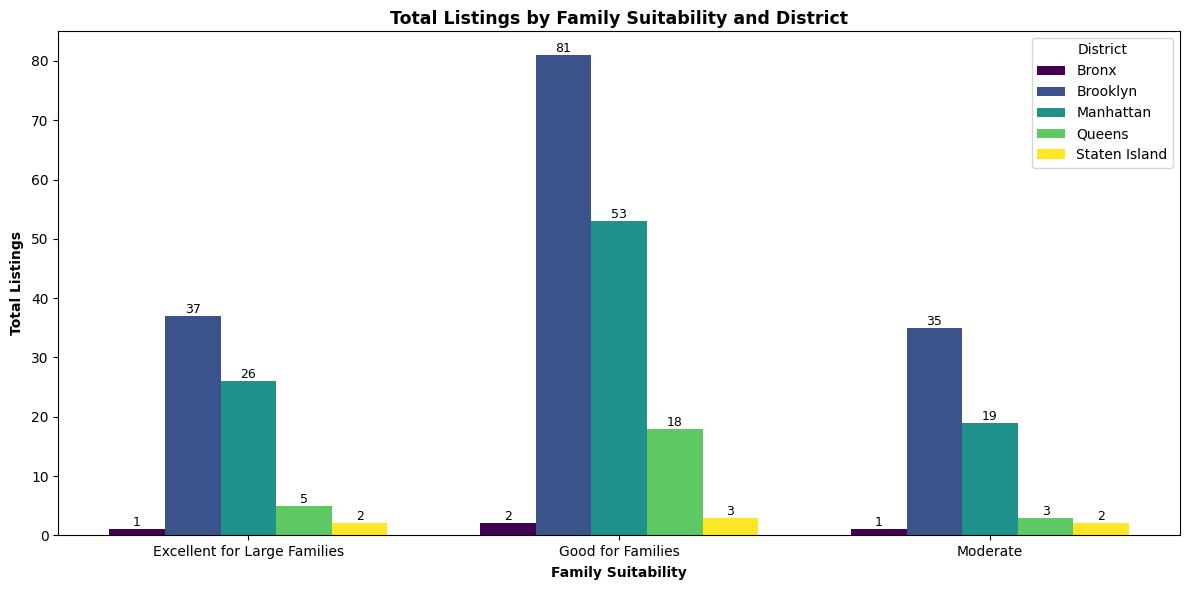

In [64]:
# Data
total_list = large_fam.groupby('family_suitability')['district'].value_counts().unstack().fillna(0).reset_index()
df_long = total_list.melt(
    id_vars='family_suitability',
    var_name='district',
    value_name='count'
)

# Kategori
family_categories = df_long['family_suitability'].unique()
districts = df_long['district'].unique()

x = np.arange(len(family_categories))
width = 0.15

# Colormap viridis
colors = cm.viridis(np.linspace(0, 1, len(districts)))

# Plot
plt.figure(figsize=(12, 6))
for i, (district, color) in enumerate(zip(districts, colors)):
    subset = df_long[df_long['district'] == district]

    bars = plt.bar(
        x + i * width,
        subset['count'],
        width=width,
        label=district,
        color=color
    )

    # Label angka di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            int(height),
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.xticks(
    x + width * (len(districts) - 1) / 2,
    family_categories,
    rotation=0
)

plt.xlabel('Family Suitability', fontweight='bold', labelpad=5)
plt.ylabel('Total Listings', fontweight='bold', labelpad=5)
plt.title('Total Listings by Family Suitability and District', fontweight='bold', fontsize=12.5, pad=5)
plt.legend(title='District')
plt.tight_layout()
plt.show()

> **Insight :**
1. Berdasarkan tiap kategori family suitability, penginapan untuk keluarga besar (large family) lebih banyak tersebar di Wilayah Brooklyn dan Manhattan
2. Penginapan dengan kategori Excellent for Families memiliki jumlah yang sedikit dibandingkan kategori lainnya. Hal ini menunjukkan penginapan yang benar-benar optimum untuk keluarga besar sangat jarang
3. Total penginapan banyak tersebar di wilayah Brooklyn dan Manhattan, namun dalam kategori Good for Families dan Moderate. Sehingga, meskipun supply tinggi hal ini bukan kategori penginapan yang optimal untuk keluarga besar
4. Bronx secara konsisten memiliki jumlah listing paling sedikit pada seluruh kategori family suitability, mengindikasikan keterbatasan pilihan bagi keluarga besar di wilayah ini

### **Total listings by room type : for large family**

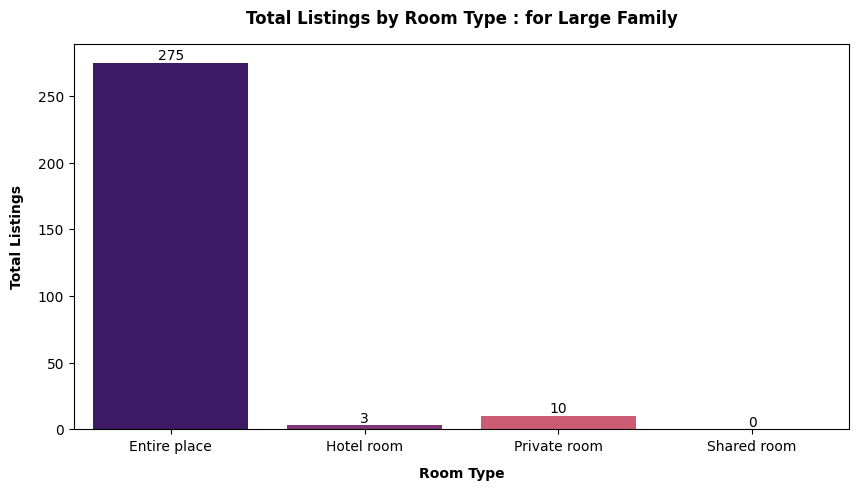

In [65]:
# Bar chart untuk kategori family size
room_type = large_fam['room_type'].value_counts().reset_index()
room_type.columns = ['room_type', 'total_listings']

# Bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=room_type,
    x='room_type',
    y='total_listings',
    hue='room_type',
    palette='magma'
)

# Label
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )

plt.title('Total Listings by Room Type : for Large Family', pad=15, fontweight='bold')
plt.xlabel('Room Type', labelpad=10, fontweight='bold')
plt.ylabel('Total Listings', labelpad=10, fontweight='bold')
plt.show()

> **Insight :**
1. Berdasarkan tipe kamar (room type), penginapan yang menyediakan akomodasi sesuai untuk keluarga besar (> 5) yakni entire place (275), private room (10), dan hotel room (3)
2. Room type entire place jauh lebih banyak jumlahnya, menunjukkan bahwa privasi dan ruang penuh merupakan kebutuhan utama bagi segmen keluarga besar

### **PRICE**
---

### **Price per person and Guest Capacity**

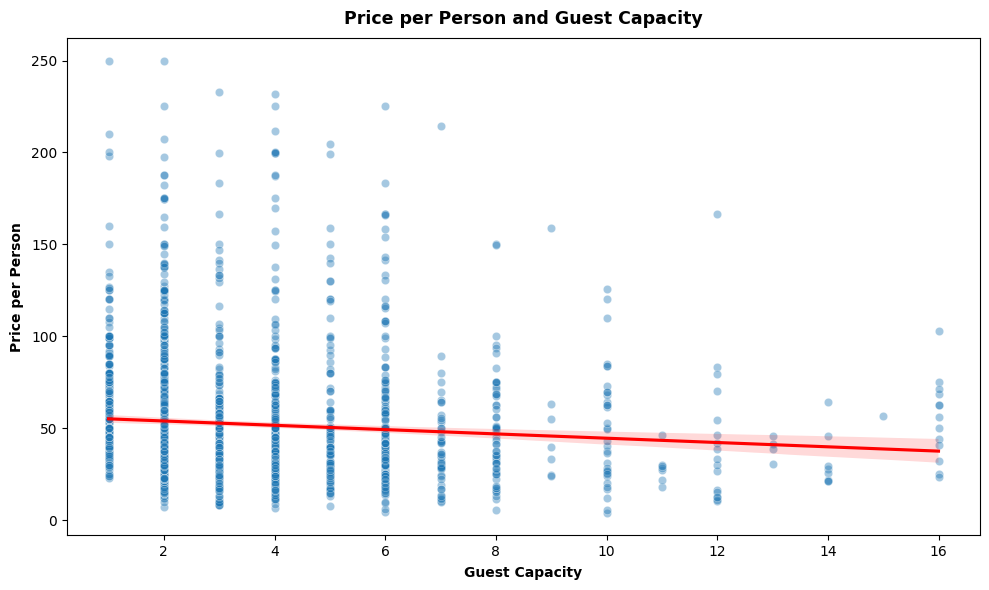

In [66]:
# Scatter plot dan tren

# Data
x = df[
    (df['price_per_person'] > 0) &
    (df['price_per_person'] < df['price_per_person'].quantile(0.99))
]

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=x,
    x='accommodates',
    y='price_per_person',
    alpha=0.4
)

# Tren
sns.regplot(
    data=x,
    x='accommodates',
    y='price_per_person',
    scatter=False,
    color='red'
)

# Title
plt.title('Price per Person and Guest Capacity', fontweight='bold', pad=10, fontsize=12.5)
plt.xlabel('Guest Capacity', fontweight='bold', labelpad=5)
plt.ylabel('Price per Person', fontweight='bold', labelpad=5)
plt.tight_layout()
plt.show()

> **Insight :**
Penginapan dengan akomodasi lebih banyak yang lebih banyak memiliki harga yang lebih murah per orang / tamu

### **Price per person by District**

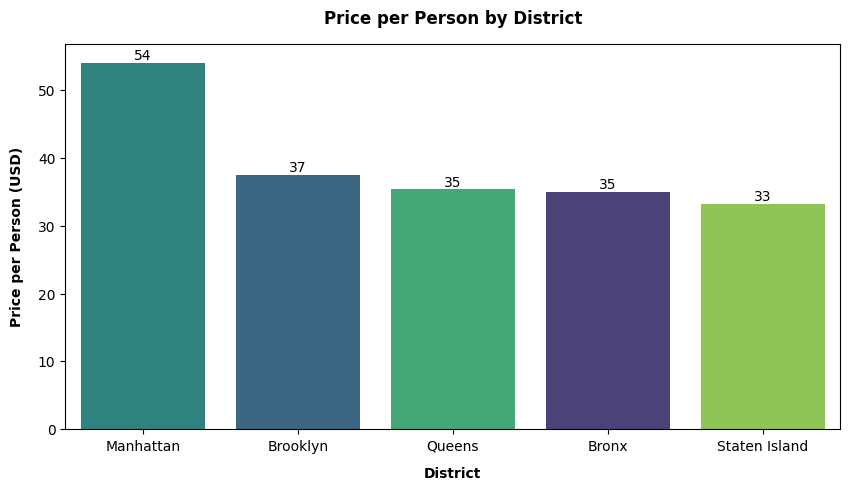

In [67]:
# Bar chart untuk mengetahui best district
best_district_price_pp = (
    large_fam
    .groupby('district', observed=True)['price_per_person_district']
    .mean()
    .reset_index()
)
best_district_price_pp.columns = ['district', 'price_per_person_district']

# Order
orders = best_district_price_pp.sort_values(
    'price_per_person_district', ascending=False
)['district']

# Bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=best_district_price_pp,
    x='district',
    y='price_per_person_district',
    hue='district',
    order=orders,
    palette='viridis'
)

# Label
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )

plt.title('Price per Person by District', pad=15, fontweight='bold')
plt.xlabel('District', labelpad=10, fontweight='bold')
plt.ylabel('Price per Person (USD)', labelpad=10, fontweight='bold')
plt.show()

> **Insight :**
1. Kota Manhattan memiliki harga per orang tertinggi (54 USD/person), dibandingkan dengan kota lain seperti Bronx, Brooklyn, Queens dan Staten Island (33 - 35 USD/person)
2. Kota Staten Island memiliki harga termurah per orang, yakni 33 USD

### **Price per Person and Popularity Score**

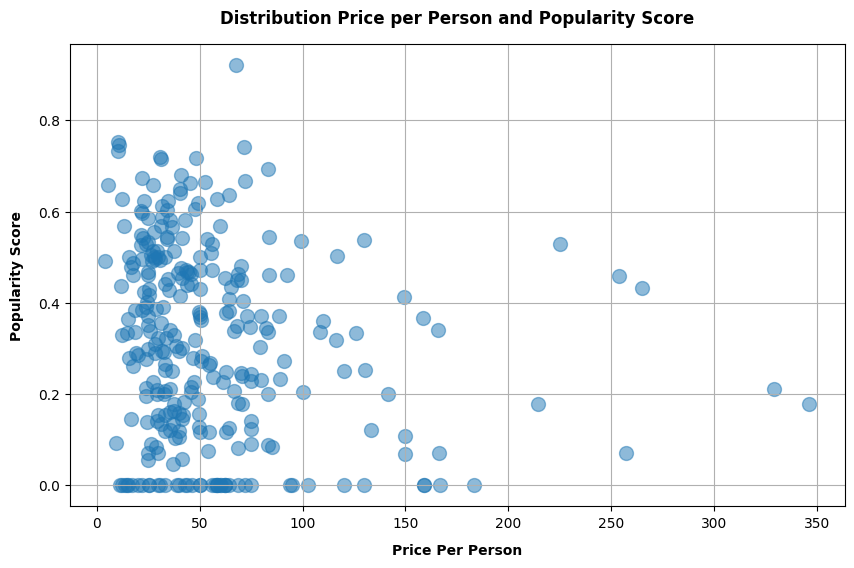

In [68]:
# SCATTERPLOT

# Plot
plt.figure(figsize=(10,6))
plt.scatter(
    large_fam['price_per_person'],
    large_fam['popularity_score'],
    s=100,
    alpha=0.5
)

# Set Title
plt.title('Distribution Price per Person and Popularity Score', fontweight='bold', pad=15)
plt.xlabel('Price Per Person', labelpad=10, fontweight='bold')
plt.ylabel('Popularity Score', labelpad=10, fontweight='bold')

# Show Scatter Plot
plt.grid(True)
plt.show()

> **Popularity score and price per person**
---
> **Insight :**
1. Sweet Spot di Harga Menengah-Rendah (< 100 USD)
Produk dengan popularity score tinggi (> 0.6) kebanyakan memiliki harga < 100 USD/orang. Hal ini mengindikasikan bahwa value for money optimal berada di segmen harga menengah ke bawah.
2. Segmentasi pasar :
    * Budget segment (0-50): Sangat padat, popularity score bervariasi dari rendah hingga tinggi
    * Mid-range (50-100): Masih cukup padat dengan popularity yang menurun
    * Premium (100-200): Jarang, popularity umumnya rendah hingga menengah
    * Luxury (>200): Sangat sedikit, popularity score sangat rendah
    * High (> 300): Tidak selalu diminati pasar atau punya target pasar sendiri

### **DISTRICT**
---

### **Best district by Final Score**

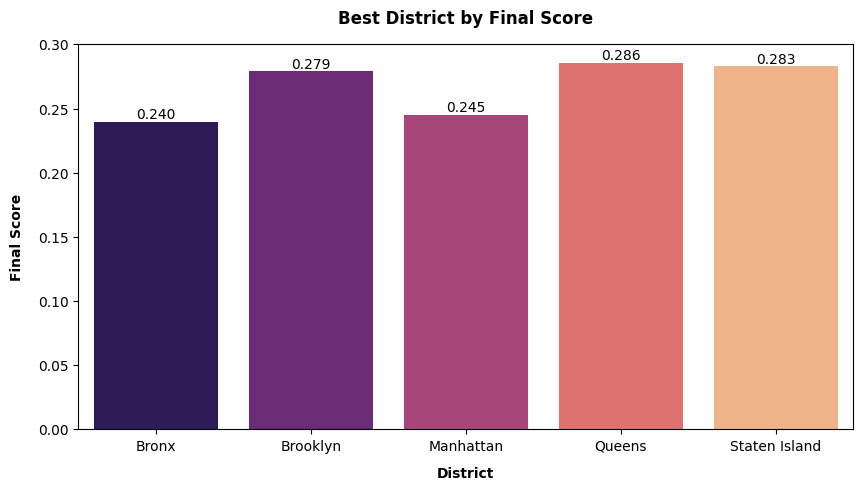

In [69]:
# Bar chart untuk mengetahui best district berdasarkan final score
best_district_fn = (
    df
    .groupby('district', observed=True)['final_score']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)
best_district_fn.columns = ['district', 'final_score']

# Bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=best_district_fn,
    x='district',
    y='final_score',
    hue='district',
    palette='magma'
)

# Label
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

plt.title('Best District by Final Score', pad=15, fontweight='bold')
plt.xlabel('District', labelpad=10, fontweight='bold')
plt.ylabel('Final Score', labelpad=10, fontweight='bold')
plt.show()

> **Final score : merupakan total skoring dari family suitability (akomodasi, total kamar, room type, dan kelengkapan fasilitas)**
---
> **Insight :**
1. Rentang final score di semua wilayah 0.240 - 0.286, menunjukkan bahwa perbedaan kualitas penginapan ramah keluarga besar antar distrik tidak terlalu ekstrem
2. Tiga wilayah terbaik berdasarkan final score yaitu Brooklyn, Queens, dan Staten Island yang mengindikasikan ketersediaan penginapan dengan kapasitas lebih besar, jumlah kamar lebih banyak, serta fasilitas yang lebih sesuai untuk keluarga besar dibandingkan distrik lainnya
3. Final score penginapan di Manhattan relatif lebih rendah dibandingkan Brooklyn, Queens, dan Staten Island. Hal ini menunjukkan bahwa penginapan di Manhattan cenderung kurang optimal untuk kebutuhan keluarga besar, meskipun dikenal sebagai wilayah dengan harga yang lebih tinggi. Dengan kata lain, harga premium di Manhattan lebih merefleksikan lokasi daripada kesesuaian akomodasi untuk keluarga besar

### **Best district by Final Score : for Large Family**

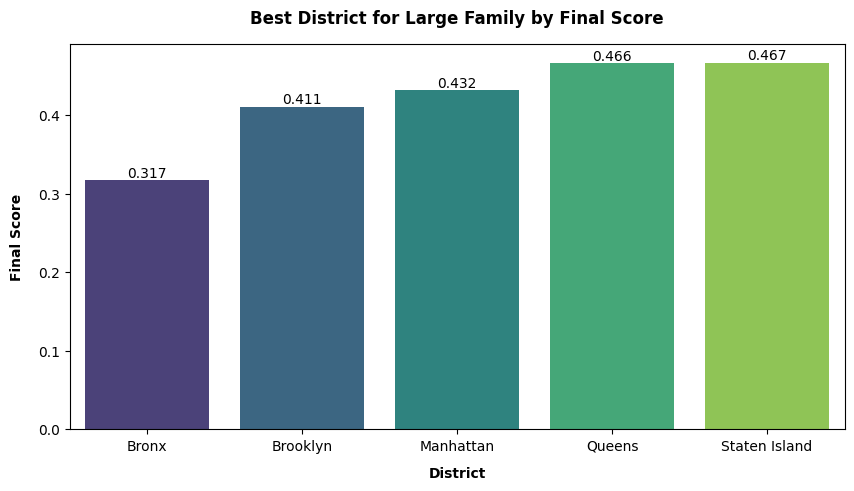

In [70]:
# Bar chart untuk mengetahui best district berdasarkan final score
best_district_fn = (
    large_fam
    .groupby('district', observed=True)['final_score']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)
best_district_fn.columns = ['district', 'final_score']

# Bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=best_district_fn,
    x='district',
    y='final_score',
    hue='district',
    palette='viridis'
)

# Label
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom'
    )

plt.title('Best District for Large Family by Final Score', pad=15, fontweight='bold')
plt.xlabel('District', labelpad=10, fontweight='bold')
plt.ylabel('Final Score', labelpad=10, fontweight='bold')
plt.show()

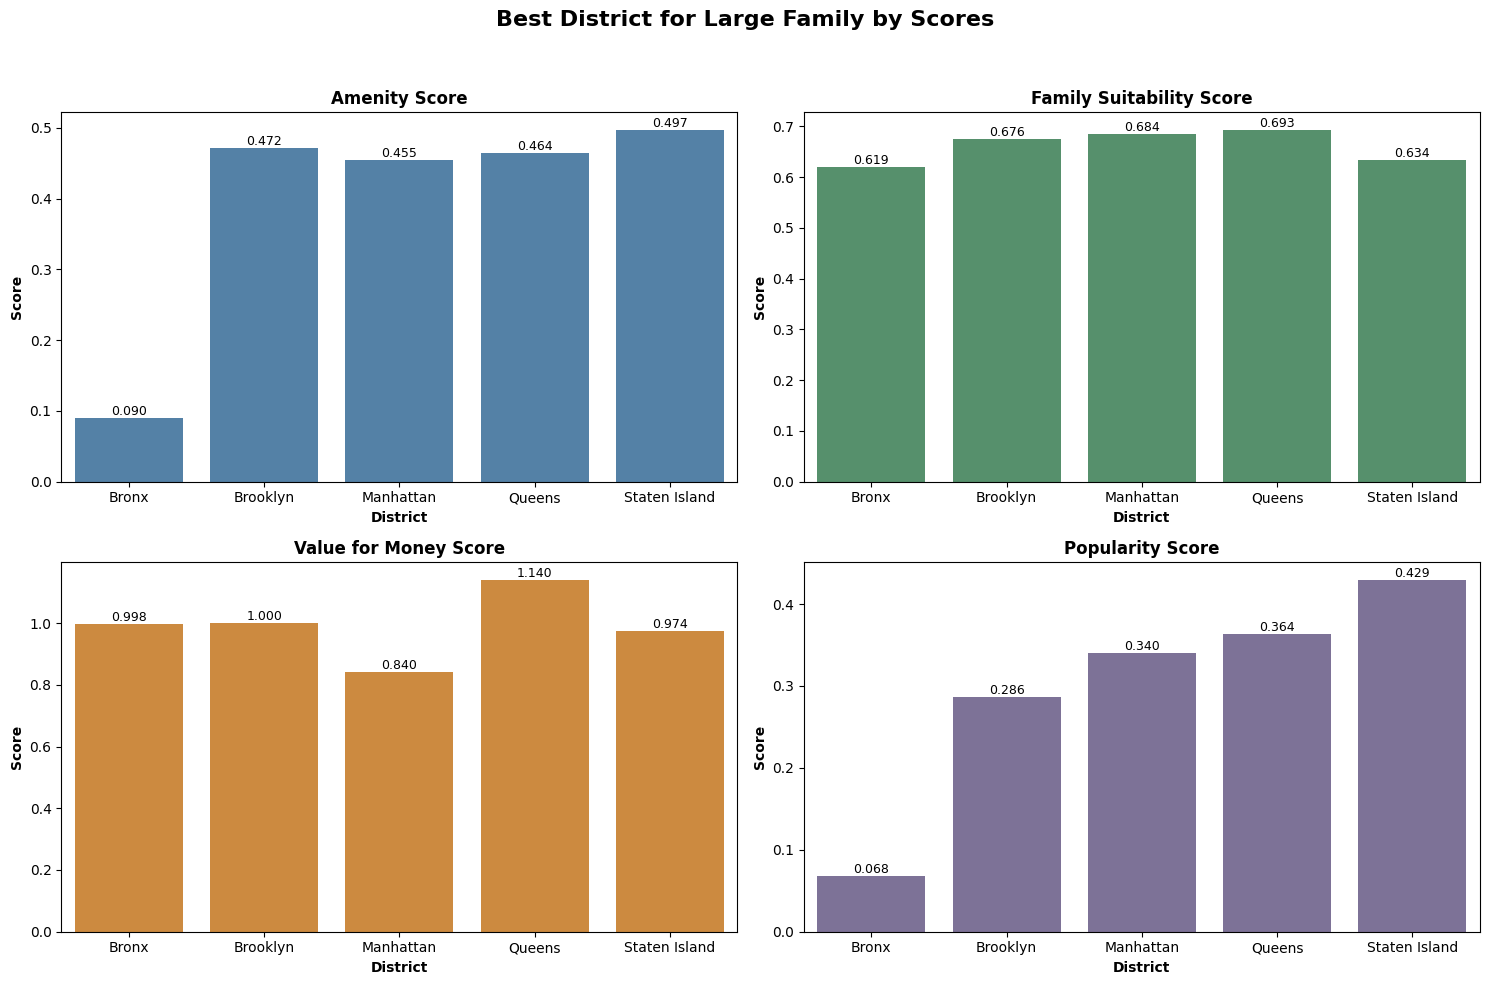

In [71]:
# Subplots 2 baris 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Metriks yang divisualkan
# metrics = [('kolom', 'judul', 'warna')]
metrics = [
    ('amenity_score', 'Amenity Score', 'steelblue'),
    ('family_suitability_score', 'Family Suitability Score', '#4C9A6A'),
    ('value_money_score', 'Value for Money Score', '#E38B29'),
    ('popularity_score', 'Popularity Score', '#7A6C9D')
]

# Loop untuk membuat bar chart pada tiap subplot
for ax, (col, title, color) in zip(axes, metrics):

    # Agregasi data:
    # Mengambil median skor per district untuk keluarga besar
    data_plot = (
        large_fam
        .groupby('district', observed=True)[col]
        .median()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Bar chart
    sns.barplot(
        data=data_plot,
        x='district',
        y=col,
        color=color,
        ax=ax
    )

    # Menambahkan label nilai di atas setiap bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

    # Pengaturan tampilan subplot
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('District', fontweight='bold')
    ax.set_ylabel('Score', fontweight='bold')
    ax.tick_params(axis='x', rotation=0)

# Judul utama untuk seluruh plot
fig.suptitle(
    'Best District for Large Family by Scores',
    fontsize=16,
    fontweight='bold'
)

# Atur spasi agar subplot dan judul tidak saling tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

> **Insight :**
1. Wilayah terbaik berdasarkan skor dan rentang skor :
    * final skor tertinggi di Wilayah Queens dan Staten Island,
      menunjukkan keseimbangan terbaik antar seluruh kriteria
    * family suitability (0.619 - 0.693) tertinggi ada di Wilayah
      Manhattan dan Queens, mengindikasikan kapasitas dan konfigurasi penginapan yang mendukung keluarga besar
    * amenity skor (0.090 - 0.497) tertinggi ada di Wilayah
      Brooklyn dan Staten Island, Wilayah Bronx memiliki amenity score terendanh (0.090)
    * value for money skor (0.840 - 1.140) tertinggi di Brooklyn
      dan Queens, menunjukkan kombinasi harga dan kualitas yang relatif optimal
    * popularity (0.068 - 0.429) : Wilayah Staten Island, Wilayah Bronx
      memiliki amenity score terendanh (0.068)
2. Berdasarkan final score, penginapan di Wilayah Queens dan Staten Island merupakan wilayah yang memiliki penginapan dengan kualitas terbaik dengan harga per malam tiap orang 33 - 35 USD
3. Brooklyn adalah Wilayah yang memiliki score tinggi pada family suitability, value for money, dan amenity, tetapi skor pada popularity lebih rendah dari. Wilayah ini bisa dipertimbangkan jika popularitas (jumlah dan frekuensi ulasan) bukan menjadi prioritas utama dalam pengambilan keputusan

### **ENTIRE PLACE LISTINGS : Not expensive listings**
---

### **Filter - Entire place Listings**

In [72]:
# Distribusi harga pada room type
entire_place = large_fam.drop(columns='amenities_list', axis=1).copy()
entire_place = entire_place[
    (entire_place['room_type'] == 'Entire place') &
    (entire_place['price'] <= df['price'].quantile(0.75))
    ]

In [73]:
# Filter tiap wilayah
brooklyn = entire_place[entire_place['district'] == 'Brooklyn']
queens = entire_place[entire_place['district'] == 'Queens']
staten_island = entire_place[entire_place['district'] == 'Staten Island']

### **Brooklyn District**

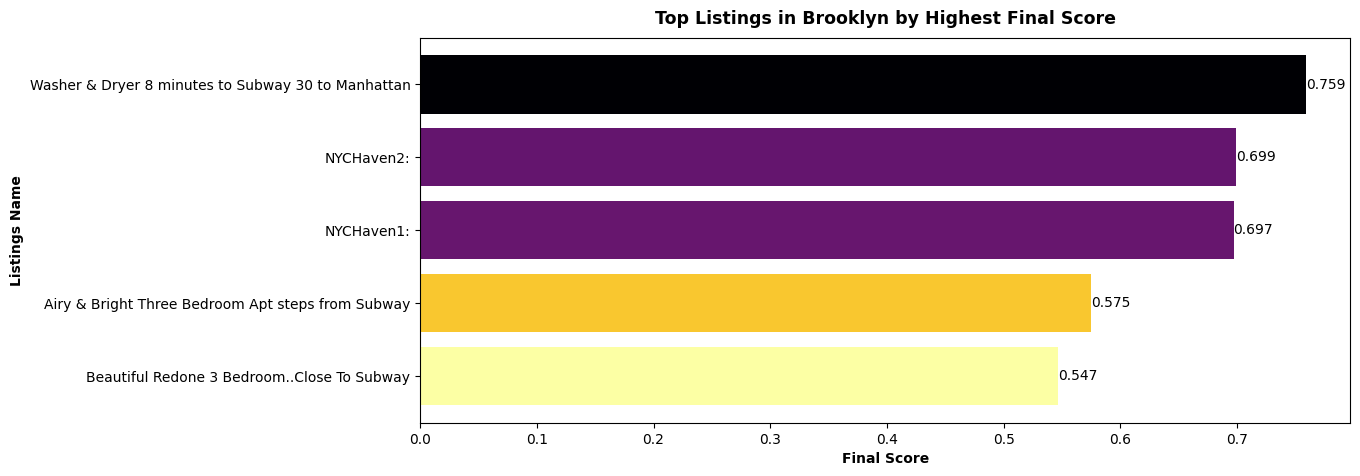


 Top 5 Listings in Brooklyn and Characteristic :


,name,district,room_type,accommodates,bedrooms,amenity_score,price,price_group,price_per_person,total_reviews,reviews_per_month
0,Washer & Dryer 8 minutes to Subway 30 to Manha...,Brooklyn,Entire place,10.0,3.0,0.517,56.0,Lower-priced (< Q1),5.60,68.0,3.0
1,NYCHaven2:,Brooklyn,Entire place,12.0,3.0,0.512,131.0,Optimum (Median–Q3),10.92,270.0,5.0
2,NYCHaven1:,Brooklyn,Entire place,12.0,3.0,0.485,125.0,Optimum (Median–Q3),10.42,283.0,4.0
3,Airy & Bright Three Bedroom Apt steps from Subway,Brooklyn,Entire place,8.0,3.0,0.430,178.0,Optimum (Median–Q3),22.25,77.0,3.0
4,Beautiful Redone 3 Bedroom..Close To Subway,Brooklyn,Entire place,10.0,3.0,0.320,178.0,Optimum (Median–Q3),17.80,17.0,1.0


In [74]:
# BAR CHART - BROOKLYN
brooklyn_head = brooklyn.sort_values(by='final_score', ascending=False).head(5).reset_index()
chart = brooklyn_head[['name', 'final_score']].reset_index().round(3)
chart.drop(columns='index', axis=1, inplace=True)

# DataFrame definition
values = chart['final_score']
labels = chart['name']

# Set Color
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.inferno_r(norm(values))

# Set figure
plt.figure(figsize=(12,5))
plt.barh(labels, values, color=colors)

# Add text values
for i, v in enumerate(values):
  plt.text(v, i, str(v), va='center')

# Set Title
plt.xlabel('Final Score', fontweight='bold')
plt.ylabel('Listings Name', fontweight='bold')
plt.title('Top Listings in Brooklyn by Highest Final Score', fontweight='bold', pad=10, fontsize=12.5)
plt.gca().invert_yaxis()

# Show Bar Chart
plt.grid(False)
plt.show()

# Listings
print('\n','======='*8)
print(' Top 5 Listings in Brooklyn and Characteristic :')
display(brooklyn_head[
    ['name', 'district', 'room_type', 'accommodates', 'bedrooms', 'amenity_score',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']])

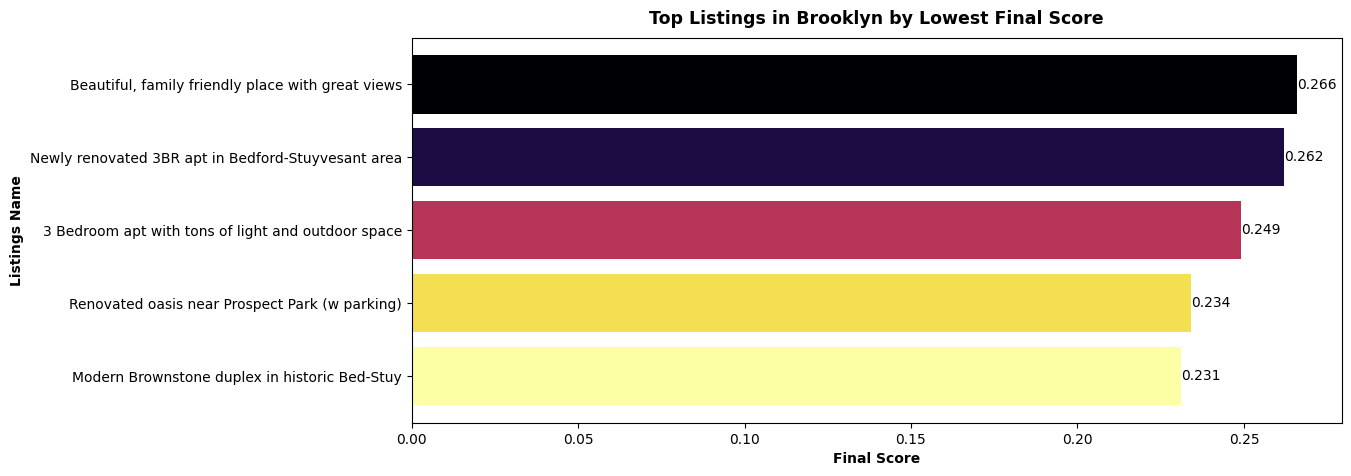


 Top Listings in Brooklyn and Characteristic :


,name,district,room_type,accommodates,bedrooms,amenity_score,price,price_group,price_per_person,total_reviews,reviews_per_month
0,"Beautiful, family friendly place with great views",Brooklyn,Entire place,5.0,3.0,0.000,178.0,Optimum (Median–Q3),35.60,11.0,0.0
1,Newly renovated 3BR apt in Bedford-Stuyvesant ...,Brooklyn,Entire place,6.0,3.0,0.285,154.0,Optimum (Median–Q3),25.67,0.0,0.0
2,3 Bedroom apt with tons of light and outdoor s...,Brooklyn,Entire place,6.0,3.0,0.000,120.0,Mid-range (Q1–Median),20.00,0.0,0.0
3,Renovated oasis near Prospect Park (w parking),Brooklyn,Entire place,6.0,3.0,0.070,199.0,Optimum (Median–Q3),33.17,0.0,0.0
4,Modern Brownstone duplex in historic Bed-Stuy,Brooklyn,Entire place,5.0,3.0,0.320,200.0,Optimum (Median–Q3),40.00,0.0,0.0


In [75]:
# BAR CHART - BROOKLYN
brooklyn_tail = (
    brooklyn
    .sort_values(by='final_score', ascending=False)
    .drop_duplicates(subset='name')
    .tail(5)
    .reset_index()
    )
chart = brooklyn_tail[['name', 'final_score']].reset_index().round(3)
chart.drop(columns='index', axis=1, inplace=True)

# DataFrame definition
values = chart['final_score']
labels = chart['name']

# Set Color
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.inferno_r(norm(values))

# Set figure
plt.figure(figsize=(12,5))
plt.barh(labels, values, color=colors)

# Add text values
for i, v in enumerate(values):
  plt.text(v, i, str(v), va='center')

# Set Title
plt.xlabel('Final Score', fontweight='bold')
plt.ylabel('Listings Name', fontweight='bold')
plt.title('Top Listings in Brooklyn by Lowest Final Score', fontweight='bold', pad=10, fontsize=12.5)
plt.gca().invert_yaxis()

# Show Bar Chart
plt.grid(False)
plt.show()

# Karakteristik top 5
print('\n','======='*8)
print(' Top Listings in Brooklyn and Characteristic :')
display(brooklyn_tail[
    ['name', 'district', 'room_type', 'accommodates', 'bedrooms', 'amenity_score',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']])

### **Queens District**

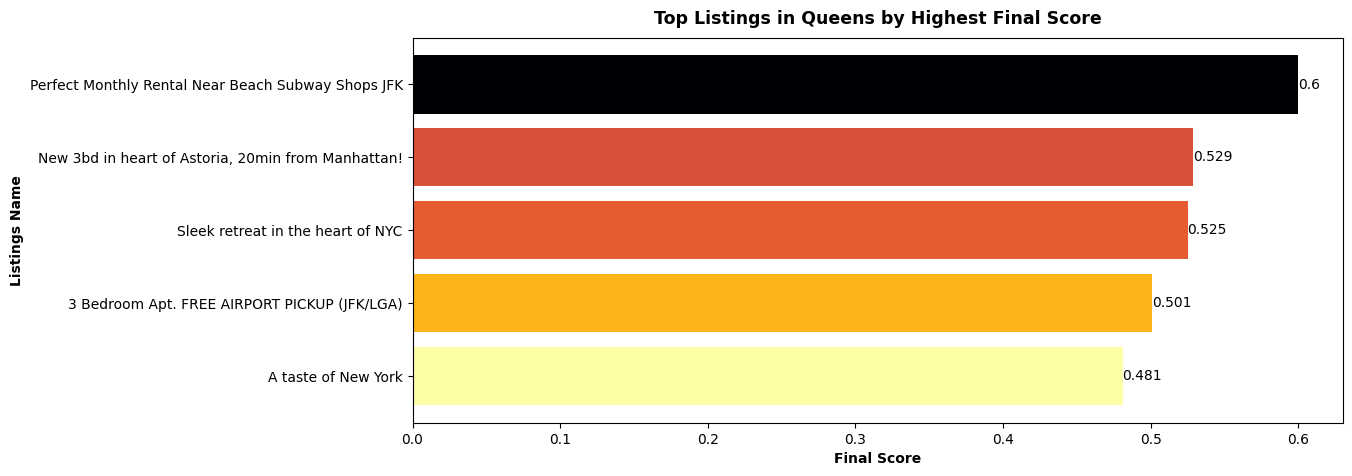


 Top Listings in Queens and Characteristic :


,name,district,room_type,accommodates,bedrooms,amenity_score,price,price_group,price_per_person,total_reviews,reviews_per_month
0,Perfect Monthly Rental Near Beach Subway Shops...,Queens,Entire place,8.0,4.0,0.580,105.0,Mid-range (Q1–Median),13.12,100.0,1.0
1,"New 3bd in heart of Astoria, 20min from Manhat...",Queens,Entire place,9.0,3.0,0.355,214.0,Optimum (Median–Q3),23.78,43.0,2.0
2,Sleek retreat in the heart of NYC,Queens,Entire place,7.0,3.0,0.442,155.0,Optimum (Median–Q3),22.14,105.0,1.0
3,3 Bedroom Apt. FREE AIRPORT PICKUP (JFK/LGA),Queens,Entire place,8.0,3.0,0.395,140.0,Optimum (Median–Q3),17.50,4.0,2.0
4,A taste of New York,Queens,Entire place,5.0,3.0,0.502,125.0,Optimum (Median–Q3),25.00,39.0,2.0


In [76]:
# BAR CHART - QUEENS
queens_head = queens.sort_values(by='final_score', ascending=False).head(5).reset_index()
chart = queens_head[['name', 'final_score']].reset_index().round(3)
chart.drop(columns='index', axis=1, inplace=True)

# DataFrame definition
values = chart['final_score']
labels = chart['name']

# Set Color
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.inferno_r(norm(values))

# Set figure
plt.figure(figsize=(12,5))
plt.barh(labels, values, color=colors)

# Add text values
for i, v in enumerate(values):
  plt.text(v, i, str(v), va='center')

# Set Title
plt.xlabel('Final Score', fontweight='bold')
plt.ylabel('Listings Name', fontweight='bold')
plt.title('Top Listings in Queens by Highest Final Score', fontweight='bold', pad=10, fontsize=12.5)
plt.gca().invert_yaxis()

# Show Bar Chart
plt.grid(False)
plt.show()

# Karakteristik top 5
print('\n','======='*8)
print(' Top Listings in Queens and Characteristic :')
display(queens_head[
    ['name', 'district', 'room_type', 'accommodates', 'bedrooms', 'amenity_score',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']])

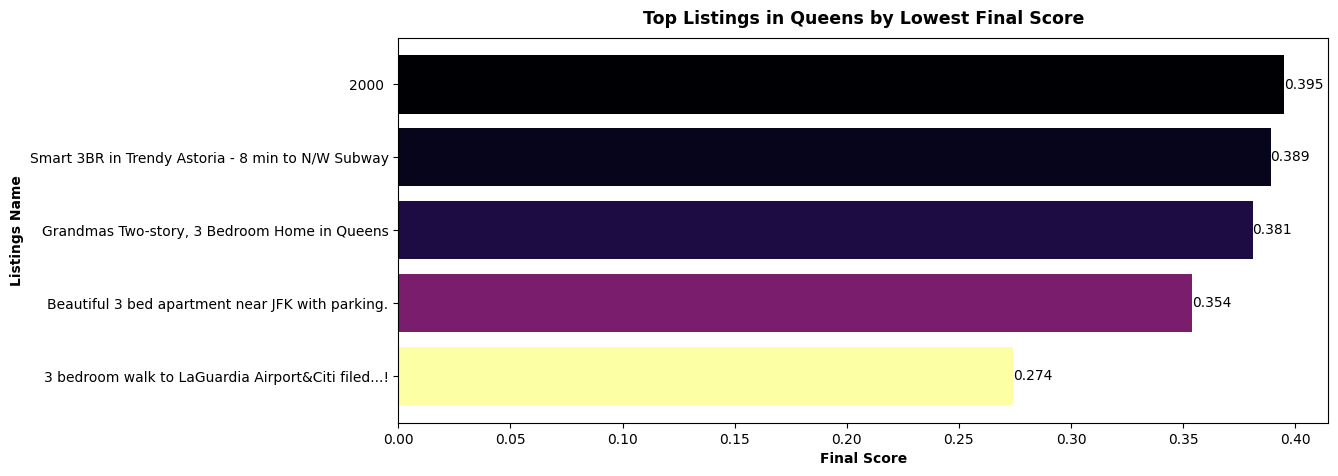


 Top Listings in Queens and Characteristic :


,name,district,room_type,accommodates,bedrooms,amenity_score,price,price_group,price_per_person,total_reviews,reviews_per_month
0,2000,Queens,Entire place,7.0,3.0,0.147,218.0,Optimum (Median–Q3),31.14,63.0,2.0
1,Smart 3BR in Trendy Astoria - 8 min to N/W Subway,Queens,Entire place,6.0,3.0,0.472,203.0,Optimum (Median–Q3),33.83,56.0,1.0
2,"Grandmas Two-story, 3 Bedroom Home in Queens",Queens,Entire place,6.0,3.0,0.492,195.0,Optimum (Median–Q3),32.50,27.0,1.0
3,Beautiful 3 bed apartment near JFK with parking.,Queens,Entire place,7.0,3.0,0.505,170.0,Optimum (Median–Q3),24.29,3.0,0.0
4,3 bedroom walk to LaGuardia Airport&Citi filed...,Queens,Entire place,6.0,3.0,0.125,149.0,Optimum (Median–Q3),24.83,1.0,0.0


In [77]:
# BAR CHART - QUEENS
queens_tail = (
    queens
    .sort_values(by='final_score', ascending=False)
    .drop_duplicates(subset='name')
    .tail(5)
    .reset_index()
    )
queens_tail.drop(columns='index', axis=1, inplace=True)
chart = queens_tail[['name', 'final_score']].reset_index().round(3)

# DataFrame definition
values = chart['final_score']
labels = chart['name']

# Set Color
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.inferno_r(norm(values))

# Set figure
plt.figure(figsize=(12,5))
plt.barh(labels, values, color=colors)

# Add text values
for i, v in enumerate(values):
  plt.text(v, i, str(v), va='center')

# Set Title
plt.xlabel('Final Score', fontweight='bold')
plt.ylabel('Listings Name', fontweight='bold')
plt.title('Top Listings in Queens by Lowest Final Score', fontweight='bold', pad=10, fontsize=12.5)
plt.gca().invert_yaxis()

# Show Bar Chart
plt.grid(False)
plt.show()

# Karakteristik top 5
print('\n','======='*8)
print(' Top Listings in Queens and Characteristic :')
display(queens_tail[
    ['name', 'district', 'room_type', 'accommodates', 'bedrooms', 'amenity_score',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']])

### **Staten Island District**

In [78]:
# Penginapan di Staten Islan
staten_island[['name', 'district', 'room_type', 'accommodates', 'bedrooms',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']]

,name,district,room_type,accommodates,bedrooms,price,price_group,price_per_person,total_reviews,reviews_per_month
471,"Spacious, light 3BD, big yard, close to all",Staten Island,Entire place,5.0,3.0,185.0,Optimum (Median–Q3),37.00,1.0,0.0
1703,Ranch style house with driveway,Staten Island,Entire place,6.0,3.0,158.0,Optimum (Median–Q3),26.33,80.0,1.0


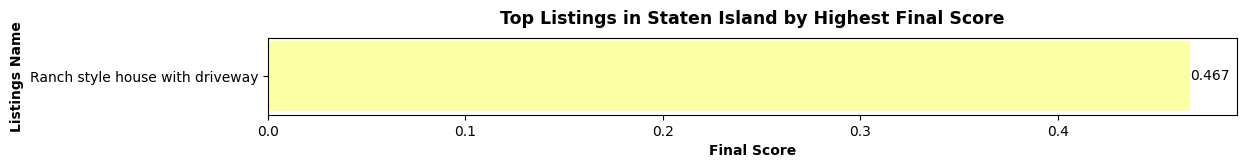


 Top Listings in Staten Island and Characteristic :


,name,district,room_type,accommodates,bedrooms,amenity_score,price,price_group,price_per_person,total_reviews,reviews_per_month
0,Ranch style house with driveway,Staten Island,Entire place,6.0,3.0,0.505,158.0,Optimum (Median–Q3),26.33,80.0,1.0


In [79]:
# BAR CHART - STATEN ISLAND
staten_island_head = staten_island.sort_values(by='final_score', ascending=False).head(1).reset_index()
chart = staten_island_head[['name', 'final_score']].reset_index().round(3)
chart.drop(columns='index', axis=1, inplace=True)

# DataFrame definition
values = chart['final_score']
labels = chart['name']

# Set Color
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.inferno_r(norm(values))

# Set figure
plt.figure(figsize=(12.5,1))
plt.barh(labels, values, color=colors)

# Add text values
for i, v in enumerate(values):
  plt.text(v, i, str(v), va='center')

# Set Title
plt.xlabel('Final Score', fontweight='bold')
plt.ylabel('Listings Name', fontweight='bold')
plt.title('Top Listings in Staten Island by Highest Final Score', fontweight='bold', pad=10, fontsize=12.5)
plt.gca().invert_yaxis()

# Show Bar Chart
plt.grid(False)
plt.show()

# Karakteristik top 5
print('\n','======='*8)
print(' Top Listings in Staten Island and Characteristic :')
display(staten_island_head[
    ['name', 'district', 'room_type', 'accommodates', 'bedrooms', 'amenity_score',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']])

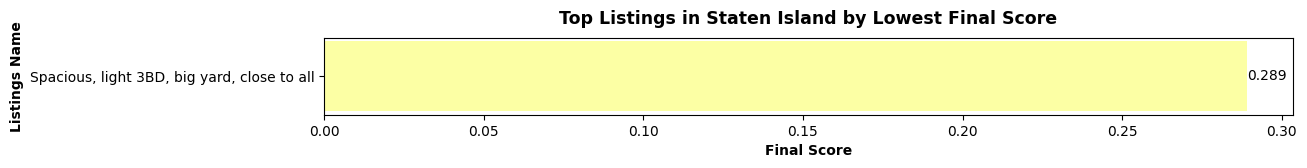


 Top Listings in Staten Island and Characteristic :


,name,district,room_type,accommodates,bedrooms,amenity_score,price,price_group,price_per_person,total_reviews,reviews_per_month
0,"Spacious, light 3BD, big yard, close to all",Staten Island,Entire place,5.0,3.0,0.783,185.0,Optimum (Median–Q3),37.0,1.0,0.0


In [80]:
# BAR CHART - STATEN ISLAND
staten_island_tail = staten_island.sort_values(by='final_score', ascending=False).tail(1).reset_index()
chart = staten_island_tail[['name', 'final_score']].reset_index().round(3)
chart.drop(columns='index', axis=1, inplace=True)

# DataFrame definition
values = chart['final_score']
labels = chart['name']

# Set Color
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.inferno_r(norm(values))

# Set figure
plt.figure(figsize=(12.5,1))
plt.barh(labels, values, color=colors)

# Add text values
for i, v in enumerate(values):
  plt.text(v, i, str(v), va='center')

# Set Title
plt.xlabel('Final Score', fontweight='bold')
plt.ylabel('Listings Name', fontweight='bold')
plt.title('Top Listings in Staten Island by Lowest Final Score', fontweight='bold', pad=10, fontsize=12.5)
plt.gca().invert_yaxis()

# Show Bar Chart
plt.grid(False)
plt.show()

# Karakteristik top 5
print('\n','======='*8)
print(' Top Listings in Staten Island and Characteristic :')
display(staten_island_tail[
    ['name', 'district', 'room_type', 'accommodates', 'bedrooms', 'amenity_score',
     'price', 'price_group', 'price_per_person', 'total_reviews', 'reviews_per_month']])

### **DISTRIBUTION PRICE ON ENTIRE PLACE LISTINGS : not expensive listings**
---

### **Total Listings**

In [81]:
# Hitung total listings berdasarkan price group
print(f'Total listings "Entire place for Large Family" based on price group : \n{entire_place['price_group'].value_counts()}')

Total listings "Entire place for Large Family" based on price group : 
price_group
Optimum (Median–Q3)      66
Mid-range (Q1–Median)    15
Lower-priced (< Q1)       1
Name: count, dtype: int64


### **Price : Boxplot**

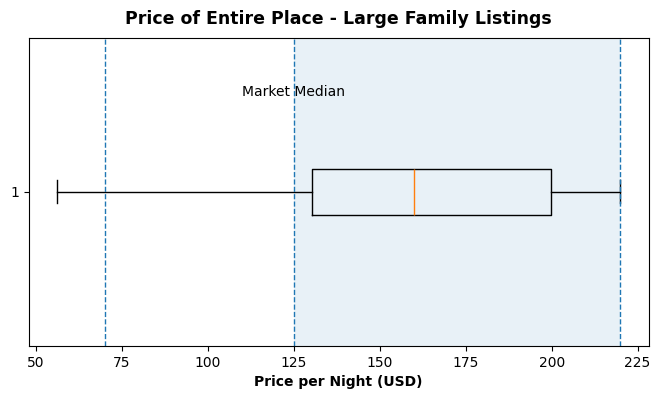

In [82]:
# Buat Boxplot
plt.figure(figsize=(8,4))
plt.boxplot(entire_place['price'], vert=False)

# Berikan garis pada Q2 dan Q3
plt.axvline(q1, linestyle='--', linewidth=1)
plt.axvline(q2, linestyle='--', linewidth=1)
plt.axvline(q3, linestyle='--', linewidth=1)

plt.text(q2,
         1.3,
         'Market Median',
         ha='center',
         va='bottom',
         )
plt.axvspan(q2, q3, alpha=0.1)

# Atur title dari boxplot
plt.title('Price of Entire Place - Large Family Listings', pad=10, fontweight='bold', fontsize=12.5)
plt.xlabel('Price per Night (USD)', fontweight='bold')
plt.show()

### **Price Group Comparison - Entire Place Listing Characteristics & Scores**

In [83]:
# Lihat total amenity score, total reviews, dan bedrooms dari masing-masing price group
all = (
    entire_place
    .groupby('price_group')[['accommodates', 'bedrooms', 'price', 'price_per_person',
                             'total_reviews', 'reviews_per_month', 'final_score',
                             'family_suitability_score', 'amenity_score', 'popularity_score']]
    .median()
    .round(2)
    .sort_values(by='final_score', ascending=False)
)
all.reset_index()
display(all)

,accommodates,bedrooms,price,price_per_person,total_reviews,reviews_per_month,final_score,family_suitability_score,amenity_score,popularity_score
price_group,,,,,,,,,,
Lower-priced (< Q1),10.0,3.0,56.0,5.60,68.0,3.0,0.76,0.80,0.52,0.66
Optimum (Median–Q3),6.0,3.0,178.0,26.16,18.5,1.0,0.41,0.62,0.42,0.32
Mid-range (Q1–Median),6.0,3.0,99.0,15.25,4.0,0.0,0.39,0.63,0.34,0.29


> **Insight :**
---
🟢 Lower-priced (< Q1) — Hidden high-value listings

  * Kapasitas: 10 tamu | 3 kamar
  * Harga: $56 | $5.60 per orang
  * Amenity score: 0.52 (tertinggi)
  * Family suitability score: 0.80 (tertinggi)
  * Final score: 0.76 (tertinggi)

📌 Meskipun berada di bawah kuartil harga pertama pasar, listing ini justru memberikan nilai terbaik bagi keluarga besar, dengan fasilitas lebih lengkap dan tingkat kesesuaian keluarga paling tinggi.

### **CONCLUSION AND RECOMMENDATION**
---

### **Conclusion :**

> **Listings :**
---
> **Kategori keluarga = akomodasi > 5 orang dan jumlah kamar minimal 3**
---
1. Penginapan untuk keluarga tidak banyak tersedia berdasarkan skor kesesuaian keluarga, sehingga pilihan lebih terbatas bagi konsumen serta berpotensi meningkatkan kompetisi dan harga bagi pemilik penginapan
2. Penginapan untuk keluarga besar (> 5 orang) merupakan segmen menengah, diantara penginapan untuk pribadi (1-2 orang: segmen utama) dan keluarga kecil (3-4 orang)
3. Total penginapan tiap Wilayah, khsusus untuk keluarga besar paling banyak terdapat di Wilayah Brooklyn dan Manhattan. Namun, penginapan dengan kategori terbaik untuk keluarga (Excellent for Family) sangat terbatas di tiap Wilayah, dibandingkan dengan kategori baik untuk keluarga (Good for Families) dan menengah (Moderate)
4. Penginapan untuk keluarga besar di Wilayah Bronx memiliki pilihan yang sangat terbatas
5. Jenis kamar yang sesuai untuk keluarga besar paling banyak tersedia dalam bentuk seluruh tempat (Entire place)

> **Price :**
---
1. Semakin banyak jumlah tamu yang bisa ditampung (accommodates), maka harga per seorangan semakin murah
2. Wilayah Manhattan memiliki harga perseorangan yang lebih tinggi (54 USD), dibandingkan Wilayah lain di New York yang berkisar 33 - 35 USD (Brooklyn, Bronx, Queens, Staten Island)
3. Sweet Spot di Harga Menengah-Rendah (< 100 USD) Produk dengan popularity score tinggi (> 0.6) kebanyakan memiliki harga < 100 USD/orang. Hal ini mengindikasikan bahwa value for money optimal berada di segmen harga menengah ke bawah. Penginapan dengan harga/orang < 50 USD memiliki variasi dalam skor popularitas dari rendah hingga tinggi

> **District :**
---
> **Final skor : merupakan total skoring dari family suitability (akomodasi, total kamar, room type, dan kelengkapan fasilitas)**
---
1. Tiga Wilayah terbaik berdasarkan final score: Brooklyn, Queens, Staten Island dengna harga per malam tiap orang 33-35 USD
2. Queens dan Staten Island adalah Wilayah yang memiliki score tinggi pada family suitability, value for money, dan amenity, dan skor popularitas
4. Wilayah Brooklyn bisa dipertimbangkan jika popularitas (jumlah dan frekuensi ulasan) bukan menjadi prioritas utama dalam pengambilan keputusan

> **Entire Place Listings :**
---
🏙️ Brooklyn — Rekomendasi Terbaik : Washer & Dryer 8 minutes to Subway, 30 to Manhattan

✅ paling lengkap secara fasilitas
✅ washer/dryer jadi high-impact amenity khususnya untuk long-stay & family guests
✅ Harga sangat kompetitif → amenities + affordability
1. Amenity score: 0.517 (tertinggi di Brooklyn)
2. Tipe: Entire place | 3 kamar | 10 tamu
3. Harga: 56 USD (Lower-priced)
4. Harga per orang: 5.60 USD
---
🚆 Queens — Rekomendasi Terbaik : Perfect Monthly Rental Near Beach Subway Shops…

📌 Harga absolut paling murah, kamar terbanyak, review solid → paling balance untuk long stay & keluarga.
1. Tipe: Entire place | 4 kamar | 8 tamu
2. Harga: 105 USD (Mid-range)
3. Harga per orang: 13.12 USD
4. Popularitas: 100 total reviews
---
🌉 Staten Island — Rekomendasi Terbaik : Ranch style house with driveway

📌 Satu-satunya top performer, cocok untuk tamu yang butuh ruang & parkir.
1. Tipe: Entire place | 3 kamar | 6 tamu
2. Harga: 158 USD (Optimum range)
3. Harga per orang: 26.33 USD
4. Popularitas: 80 total reviews

> **Distribution Price on Entire Place Listings :**
---
1. Penginapan dengan jenis kamar Entire place, khususnya untuk keluarga besar merupakan segmen premium, dengan harga yang secara sistematis lebih tinggi dibanding pasar Airbnb secara umum (berada dalam rentang Median - Q3)
2. Sweet spot : terdapat penginapan dengan harga low-priced, namun memberikan nilai terbaik bagi keluarga besar, dengan fasilitas lebih lengkap dan tingkat kesesuaian keluarga paling tinggi

### **Recommendation :**

### 🎯 **Business Recommendation**
* Target Segmen: Keluarga besar (akomodasi >5 orang, minimal 3 kamar)
* Fokus Tipe Kamar: 🏠 Entire Place

### 🏢 **Rekomendasi untuk Airbnb (Platform-Level Strategy)**
---
> 🔍 **Isu Utama Pasar**
* ⚠️ Ketersediaan penginapan family-friendly masih terbatas
* 📉 Distribusi supply tidak merata antar wilayah
* 💰 Segmen Entire Place cenderung premium → risiko affordability
---
> 🚀 **Strategi yang Direkomendasikan**
* 🏷️ Family-Friendly Badge
  * Label khusus berbasis family suitability score
  * Prioritas pada listing:
    * 👨‍👩‍👧‍👦 accommodates >5
    * 🛏️ ≥3 kamar
    * 🧺 High-impact amenities (washer/dryer, dapur lengkap)
---
> 🧭 **Redistribusi Supply Wilayah**
* 🎯 Fokus onboarding host di:
  * Bronx (supply sangat terbatas)
  * Staten Island (potensi ruang & value tinggi)
* 📣 Positioning wilayah sebagai “Family Space at Better Value”
---
> 💵 **Price Framing berbasis Harga per Orang**
* Tampilkan price per person secara eksplisit
* 🟢 Tag “Value for Family” untuk listing < USD 50/orang
---
> 🏡 **Pengembangan Segmen Long-Stay Keluarga**
* Kurasi listing dengan:
  * 🧺 Washer/dryer
  * 🍳 Dapur lengkap
* Cocok untuk:
  * Relocation
  * Extended family visit
  * Long vacation

### 🏠 **Rekomendasi untuk Penyedia Penginapan (Host-Level Strategy)**
---
> 🏙️ **Host di Wilayah Kompetitif (Brooklyn & Manhattan)**
* ⚔️ Kondisi Pasar
  * Kompetisi tinggi
  * Popularitas jadi bottleneck
* ✅ Strategi
  * 🎯 Diferensiasi lewat fasilitas, bukan perang harga
  * 🧺 Prioritaskan high-impact amenities:
    * Washer/dryer
    * Kitchen-ready untuk keluarga
  * 📆 Fokus ke:
    * Long-stay
    * Family travelers (lebih stabil)
---
> 🚆 **Host di Wilayah Bernilai Tinggi (Queens & Staten Island)**
* 💎 Keunggulan Wilayah
  * Skor tinggi pada:
    * Family suitability
    * Value for money
    * Amenity
    * Popularitas
* ✅ Strategi
  * 💰 Pertahankan mid-range pricing (hindari underpricing)
  * 📣 Tonjolkan:
    * Jumlah kamar
    * Kapasitas tamu
    * Stabilitas review
  * 🔁 Target segmen repeat booking
---
> 🌱 **Host Potensial di Wilayah Supply Rendah (Bronx)**
* 🚀 Peluang
  * Kompetitor sangat terbatas
  * Potensi first-mover advantage
* ⚠️ Catatan Penting
  * Masuk tanpa fasilitas dasar → risiko underperform
* ✅ Strategi
  * 🏠 Entire place dengan ≥3 kamar
  * 👨‍👩‍👧‍👦 Target keluarga besar & long-stay
  * 🧺 Pastikan fasilitas keluarga terpenuhi
---
> 🌍 **Strategi Umum untuk Semua Host**
* 🔑 Key Insight
  * ❌ Bukan harga murah yang dicari
  * ✅ Harga per orang yang terasa sepadan
* 📌 Implikasi
  * Kapasitas besar = keunggulan struktural
  * Harga premium dapat diterima jika:
    * 🏠 Entire place
    * 👨‍👩‍👧‍👦 Family-friendly
    * 🧺 Fasilitas lengkap